# Scan 1 Analysis

439 imaj tarandı.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("results.csv")
# df = pd.read_csv("totalscan.csv")
df = df.drop_duplicates()
print(df.columns)
df.head()

Index(['scanner', 'imagetype', 'image', 'id', 'pkgname', 'pkgversion',
       'severity', 'score', 'cvssversion'],
      dtype='object')


,scanner,imagetype,image,id,pkgname,pkgversion,severity,score,cvssversion
0,trivy,scan-library,alpine,CVE-2023-5363,libcrypto3,3.1.3-r0,high,7.5,v3
1,trivy,scan-library,alpine,CVE-2023-5678,libcrypto3,3.1.3-r0,high,7.5,v3
2,trivy,scan-library,alpine,CVE-2023-5363,libssl3,3.1.3-r0,high,7.5,v3
3,trivy,scan-library,alpine,CVE-2023-5678,libssl3,3.1.3-r0,high,7.5,v3
4,trivy,scan-library,haskell,CVE-2011-3374,apt,1.8.2.3,low,3.7,v3


In [4]:
# set(df["cvssversion"].to_list())
df[df["id"] == "CVE-2016-1252"]

,scanner,imagetype,image,id,pkgname,pkgversion,severity,score,cvssversion
39286,trivy,scan-library,glassfish,CVE-2016-1252,apt,1.0.9.8.3,medium,5.9,v3
39382,trivy,scan-library,glassfish,CVE-2016-1252,libapt-pkg4.12,1.0.9.8.3,medium,5.9,v3
40689,trivy,scan-library,hipache,CVE-2016-1252,apt,1.0.1ubuntu2.13,high,5.9,v3
40691,trivy,scan-library,hipache,CVE-2016-1252,apt-utils,1.0.1ubuntu2.13,high,5.9,v3
40726,trivy,scan-library,hipache,CVE-2016-1252,libapt-inst1.5,1.0.1ubuntu2.13,high,5.9,v3
40728,trivy,scan-library,hipache,CVE-2016-1252,libapt-pkg4.12,1.0.1ubuntu2.13,high,5.9,v3
85255,grype,scan-library,glassfish,CVE-2016-1252,apt,1.0.9.8.3,medium,4.3,v2
86478,grype,scan-library,hipache,CVE-2016-1252,apt,1.0.1ubuntu2.13,high,4.3,v2
153219,snyk,scan-library,glassfish,CVE-2016-1252,apt,1.0.9.8.3,medium,5.9,v3
156215,snyk,scan-library,hipache,CVE-2016-1252,apt,1.0.1ubuntu2.13,high,5.9,v3


In [5]:
len(df[df["cvssversion"] == "v3"].drop_duplicates())
# len(df)

175359

In [6]:
round(df["score"].sum(), 2)

1312431.5

In [7]:
df.groupby('scanner')['score'].sum()

scanner
grype    319417.0
snyk     256872.0
trivy    736142.5
Name: score, dtype: float64

## High DPI Settings

In [8]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

[Text(0, 0, '111865'), Text(0, 0, '54099'), Text(0, 0, '39430')]

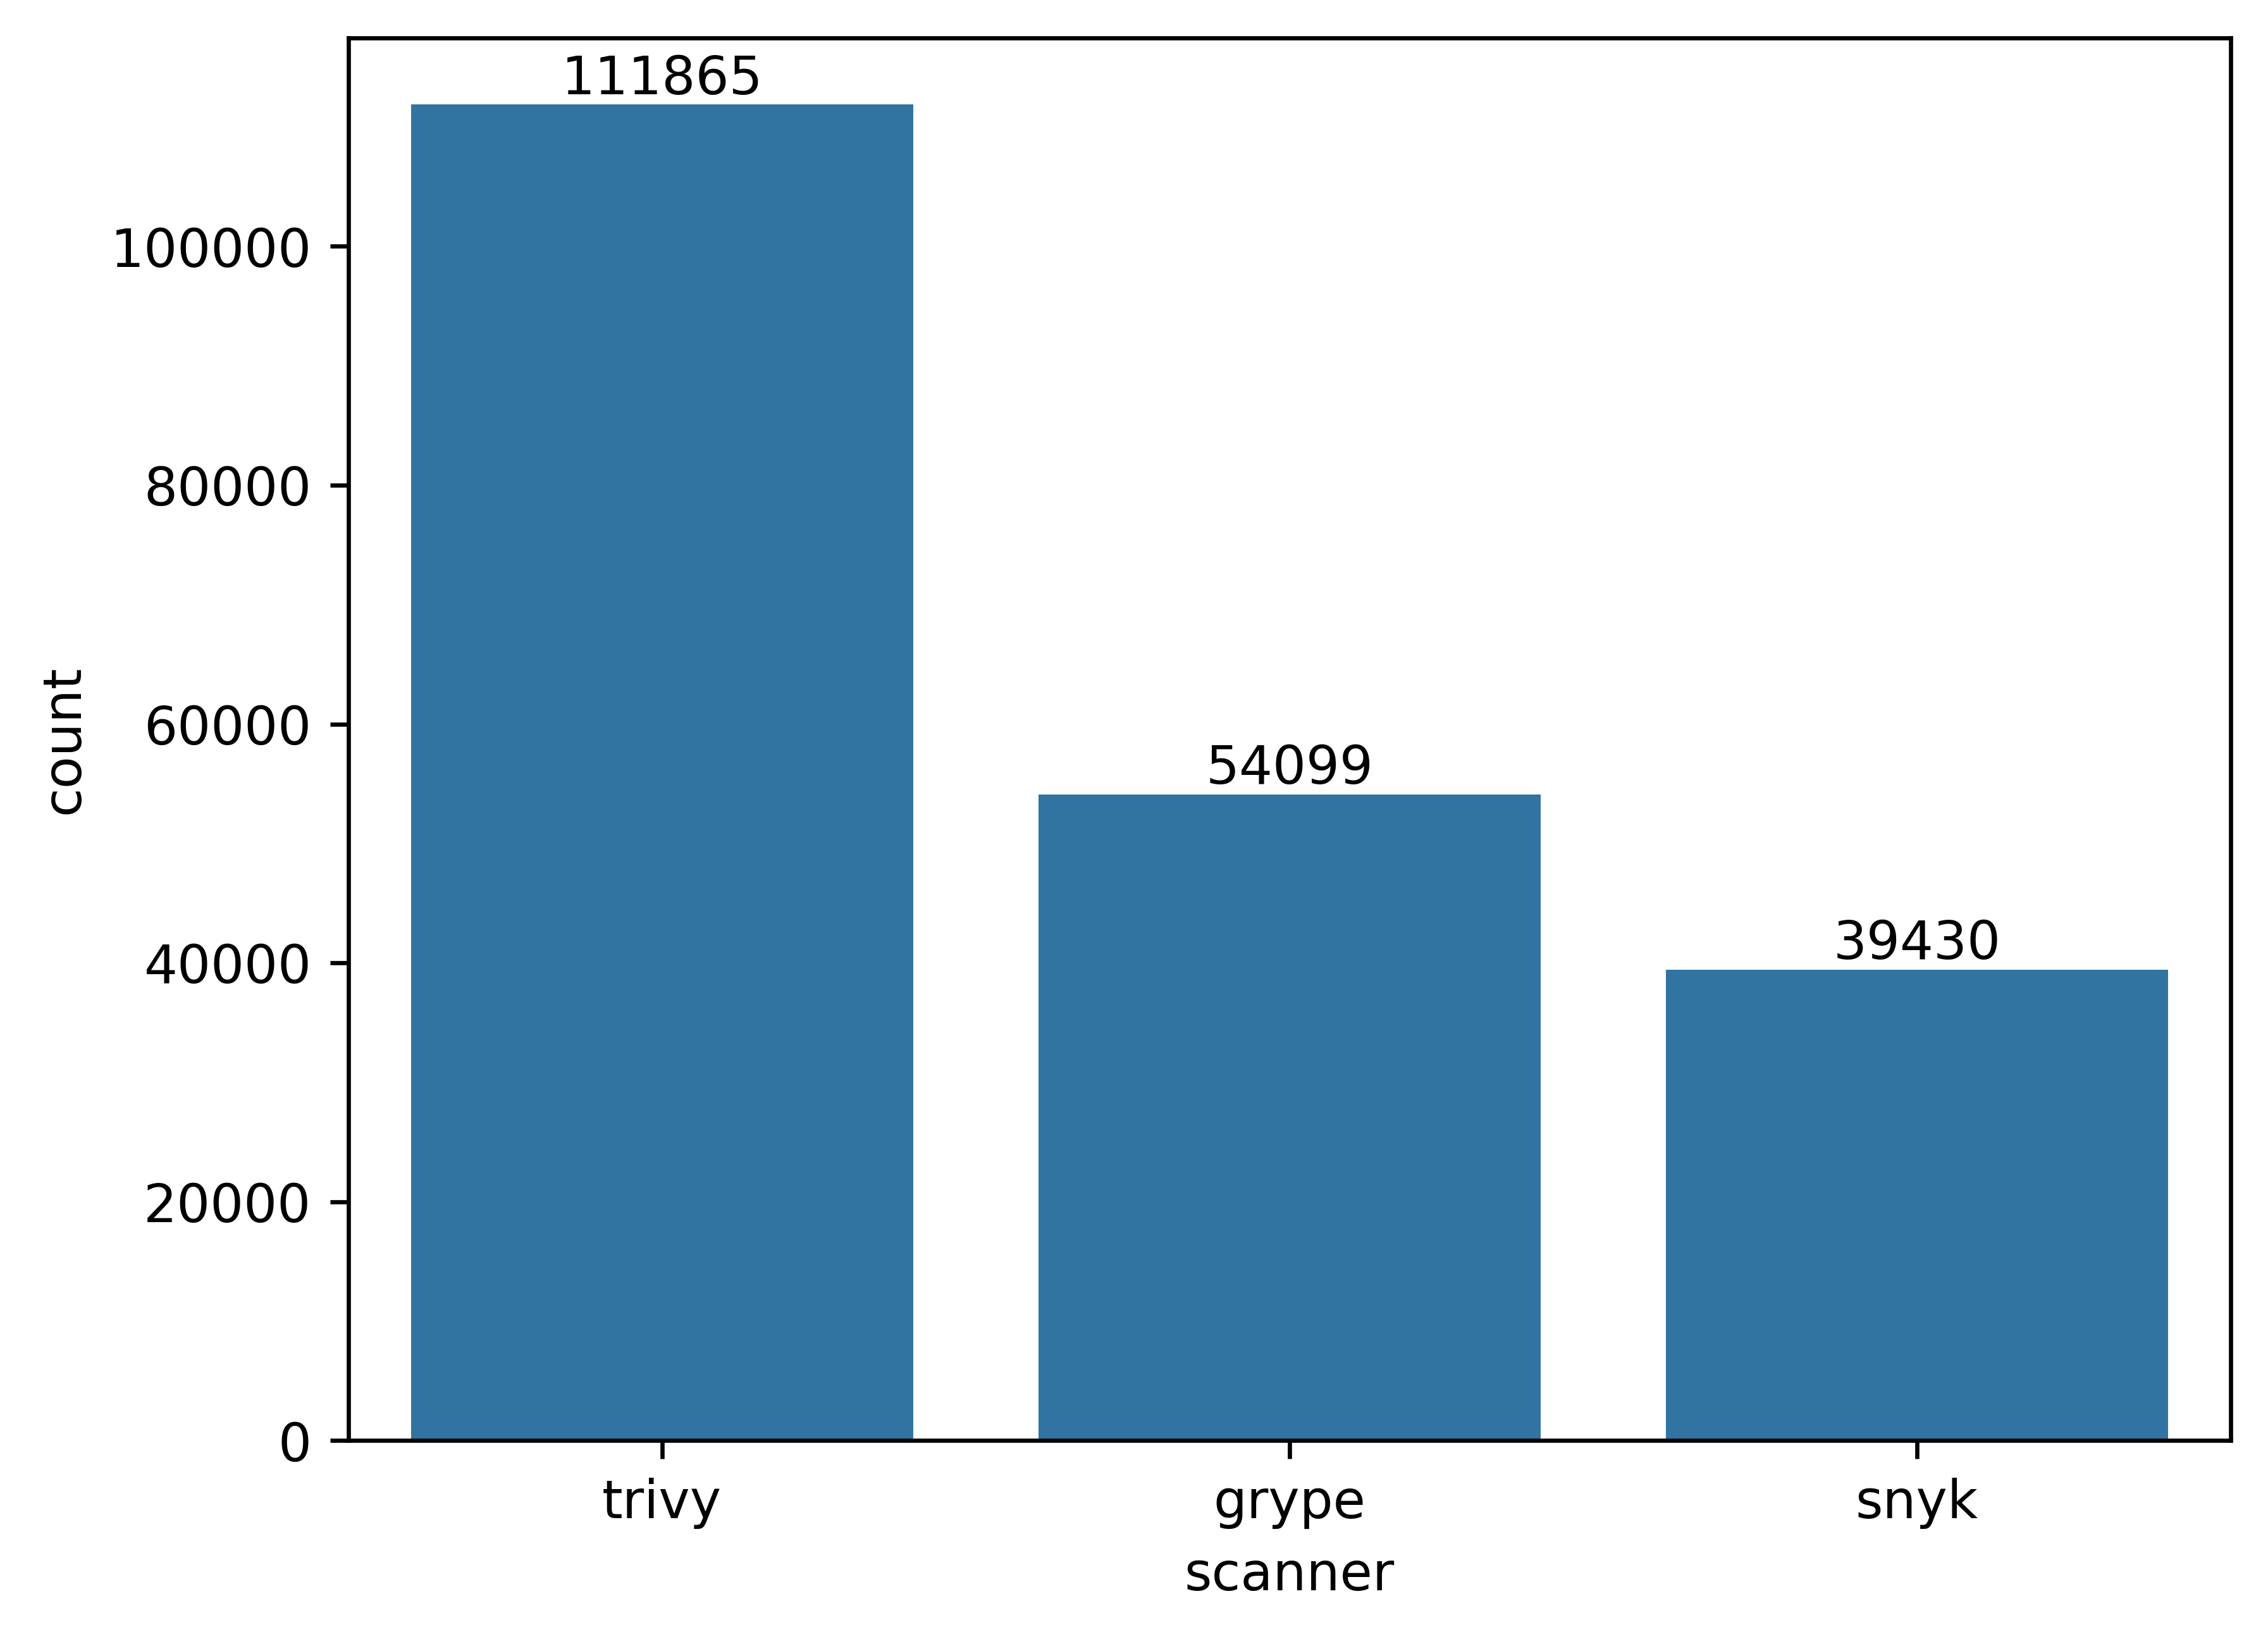

In [9]:
ax = sns.countplot(df, x="scanner")
ax.bar_label(ax.containers[0])

# İmaj Türüne Göre

resmi imaj sayısı fazla olduğunu unutma!

[Text(0, 0, '93096'), Text(0, 0, '56989'), Text(0, 0, '55309')]

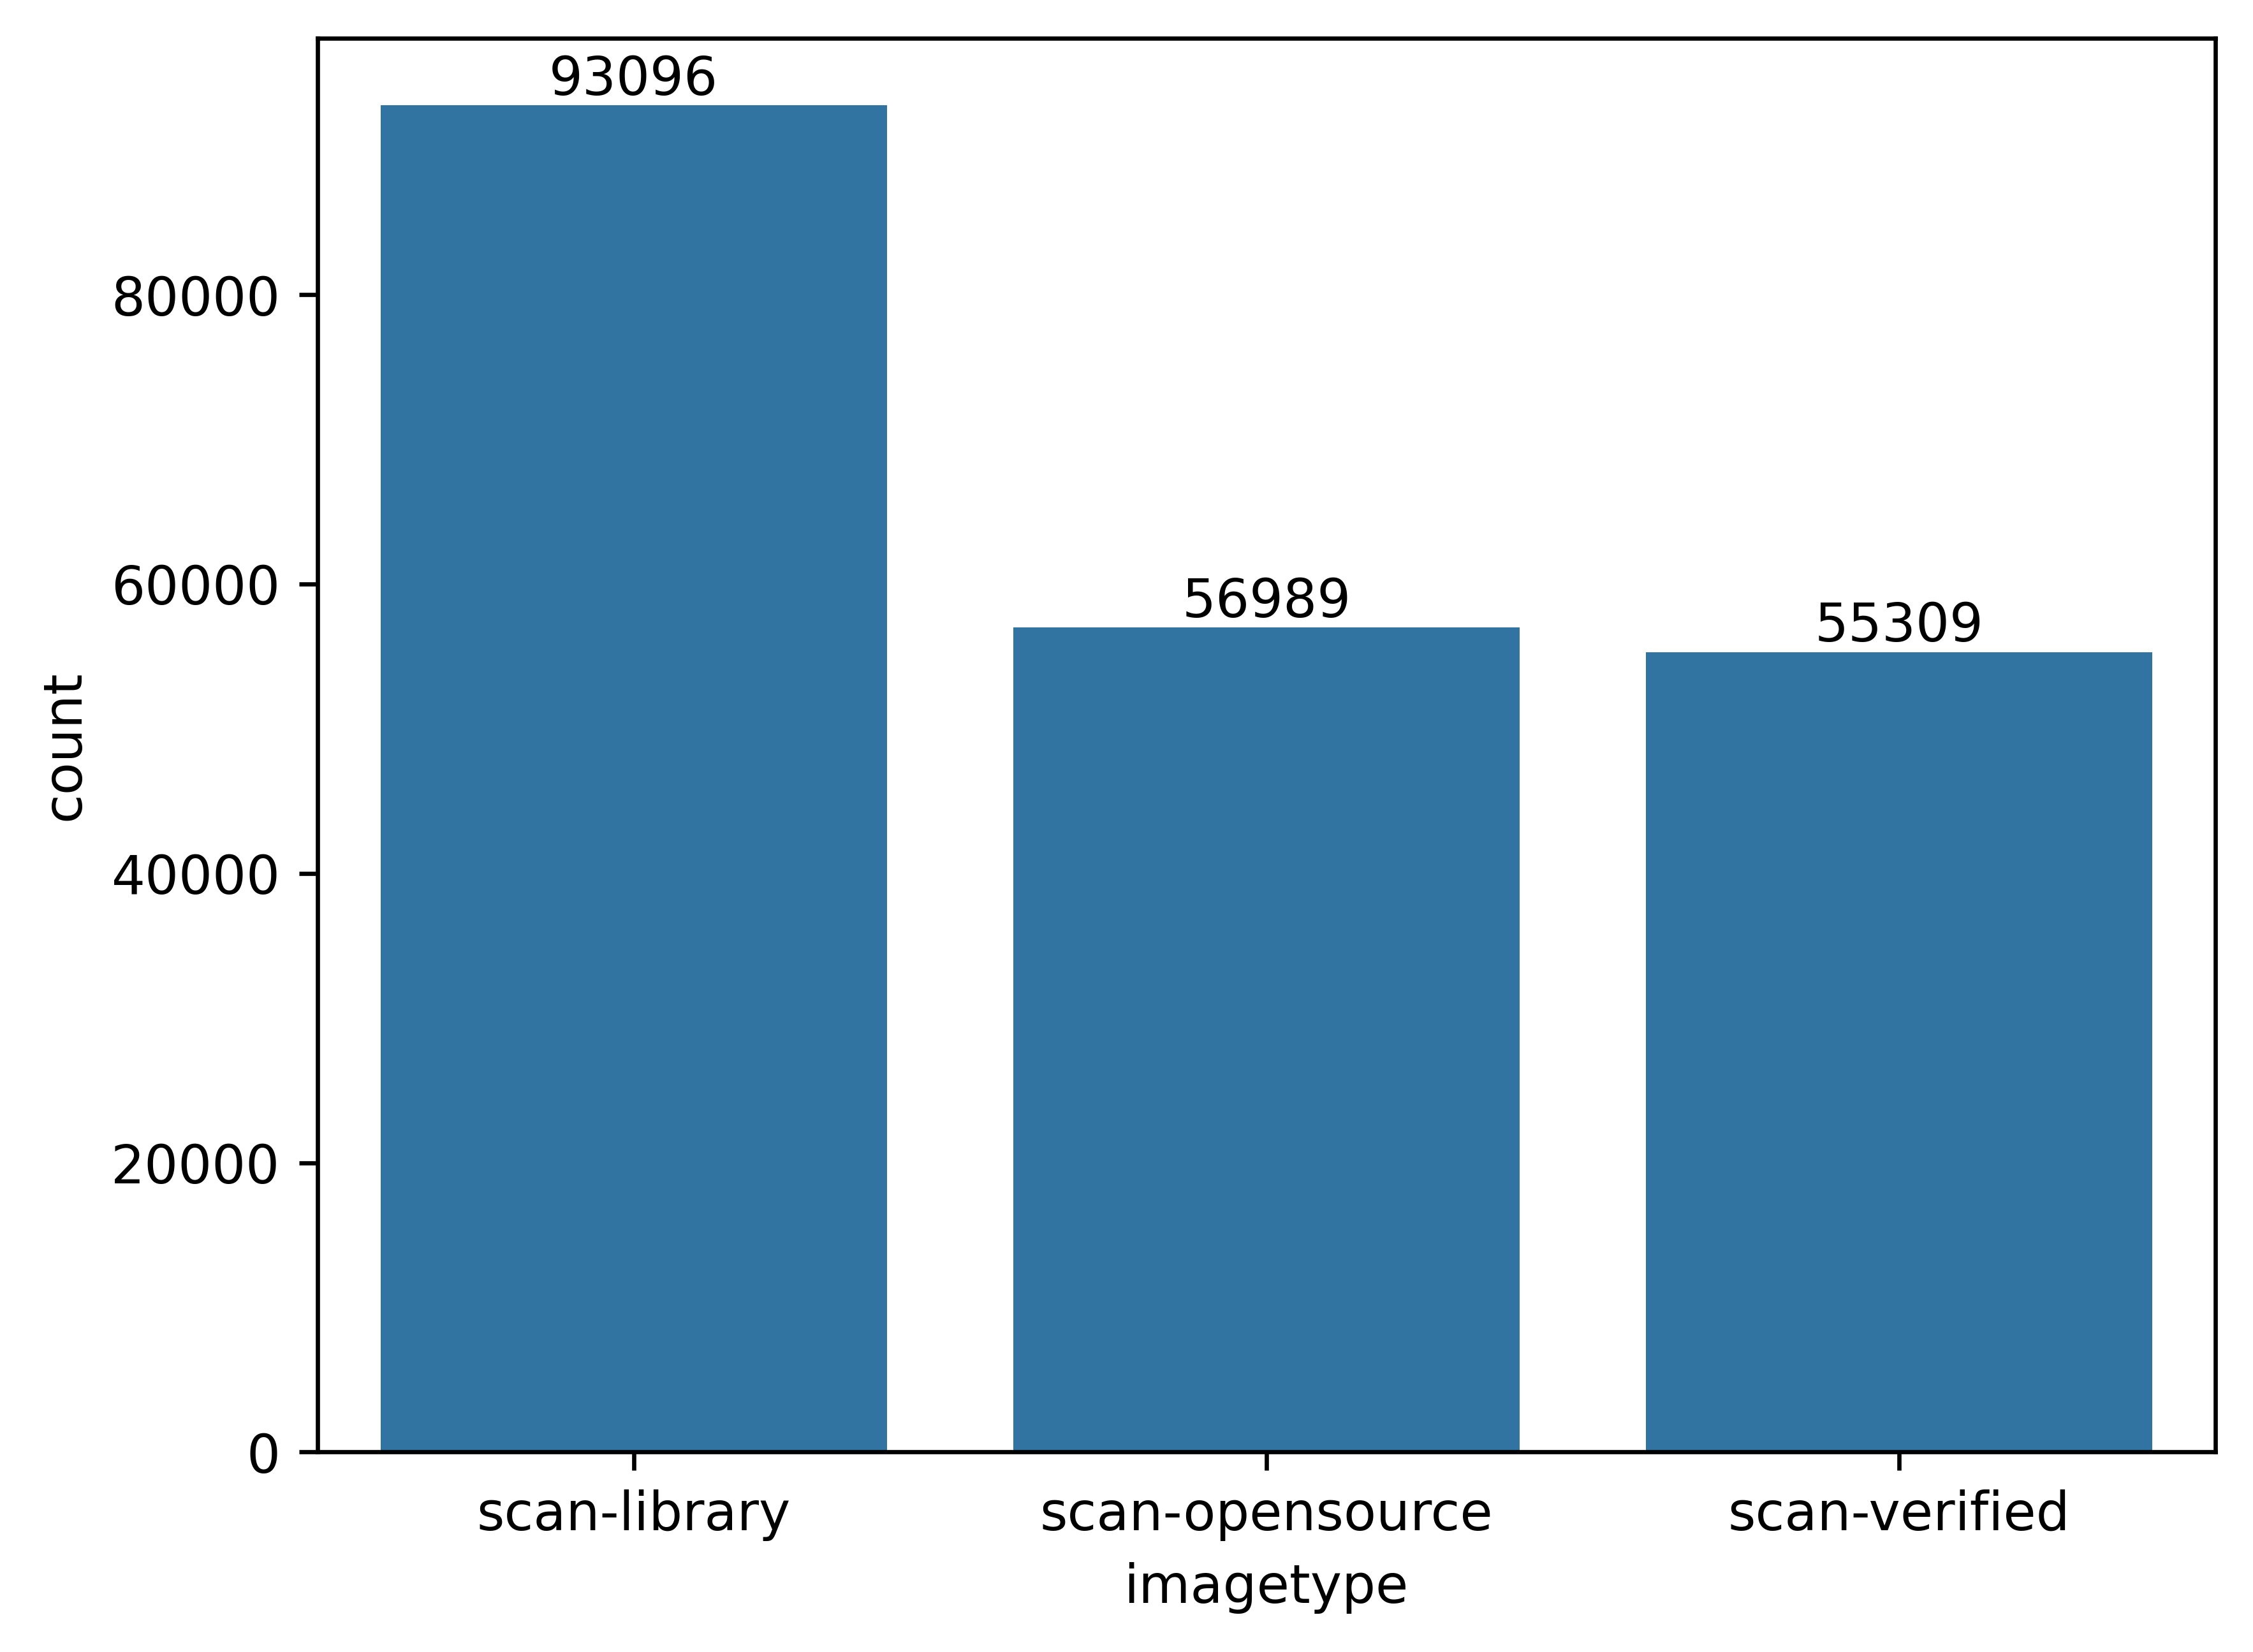

In [10]:
ax = sns.countplot(df, x="imagetype")
ax.bar_label(ax.containers[0])

<Axes: xlabel='scanner', ylabel='count'>

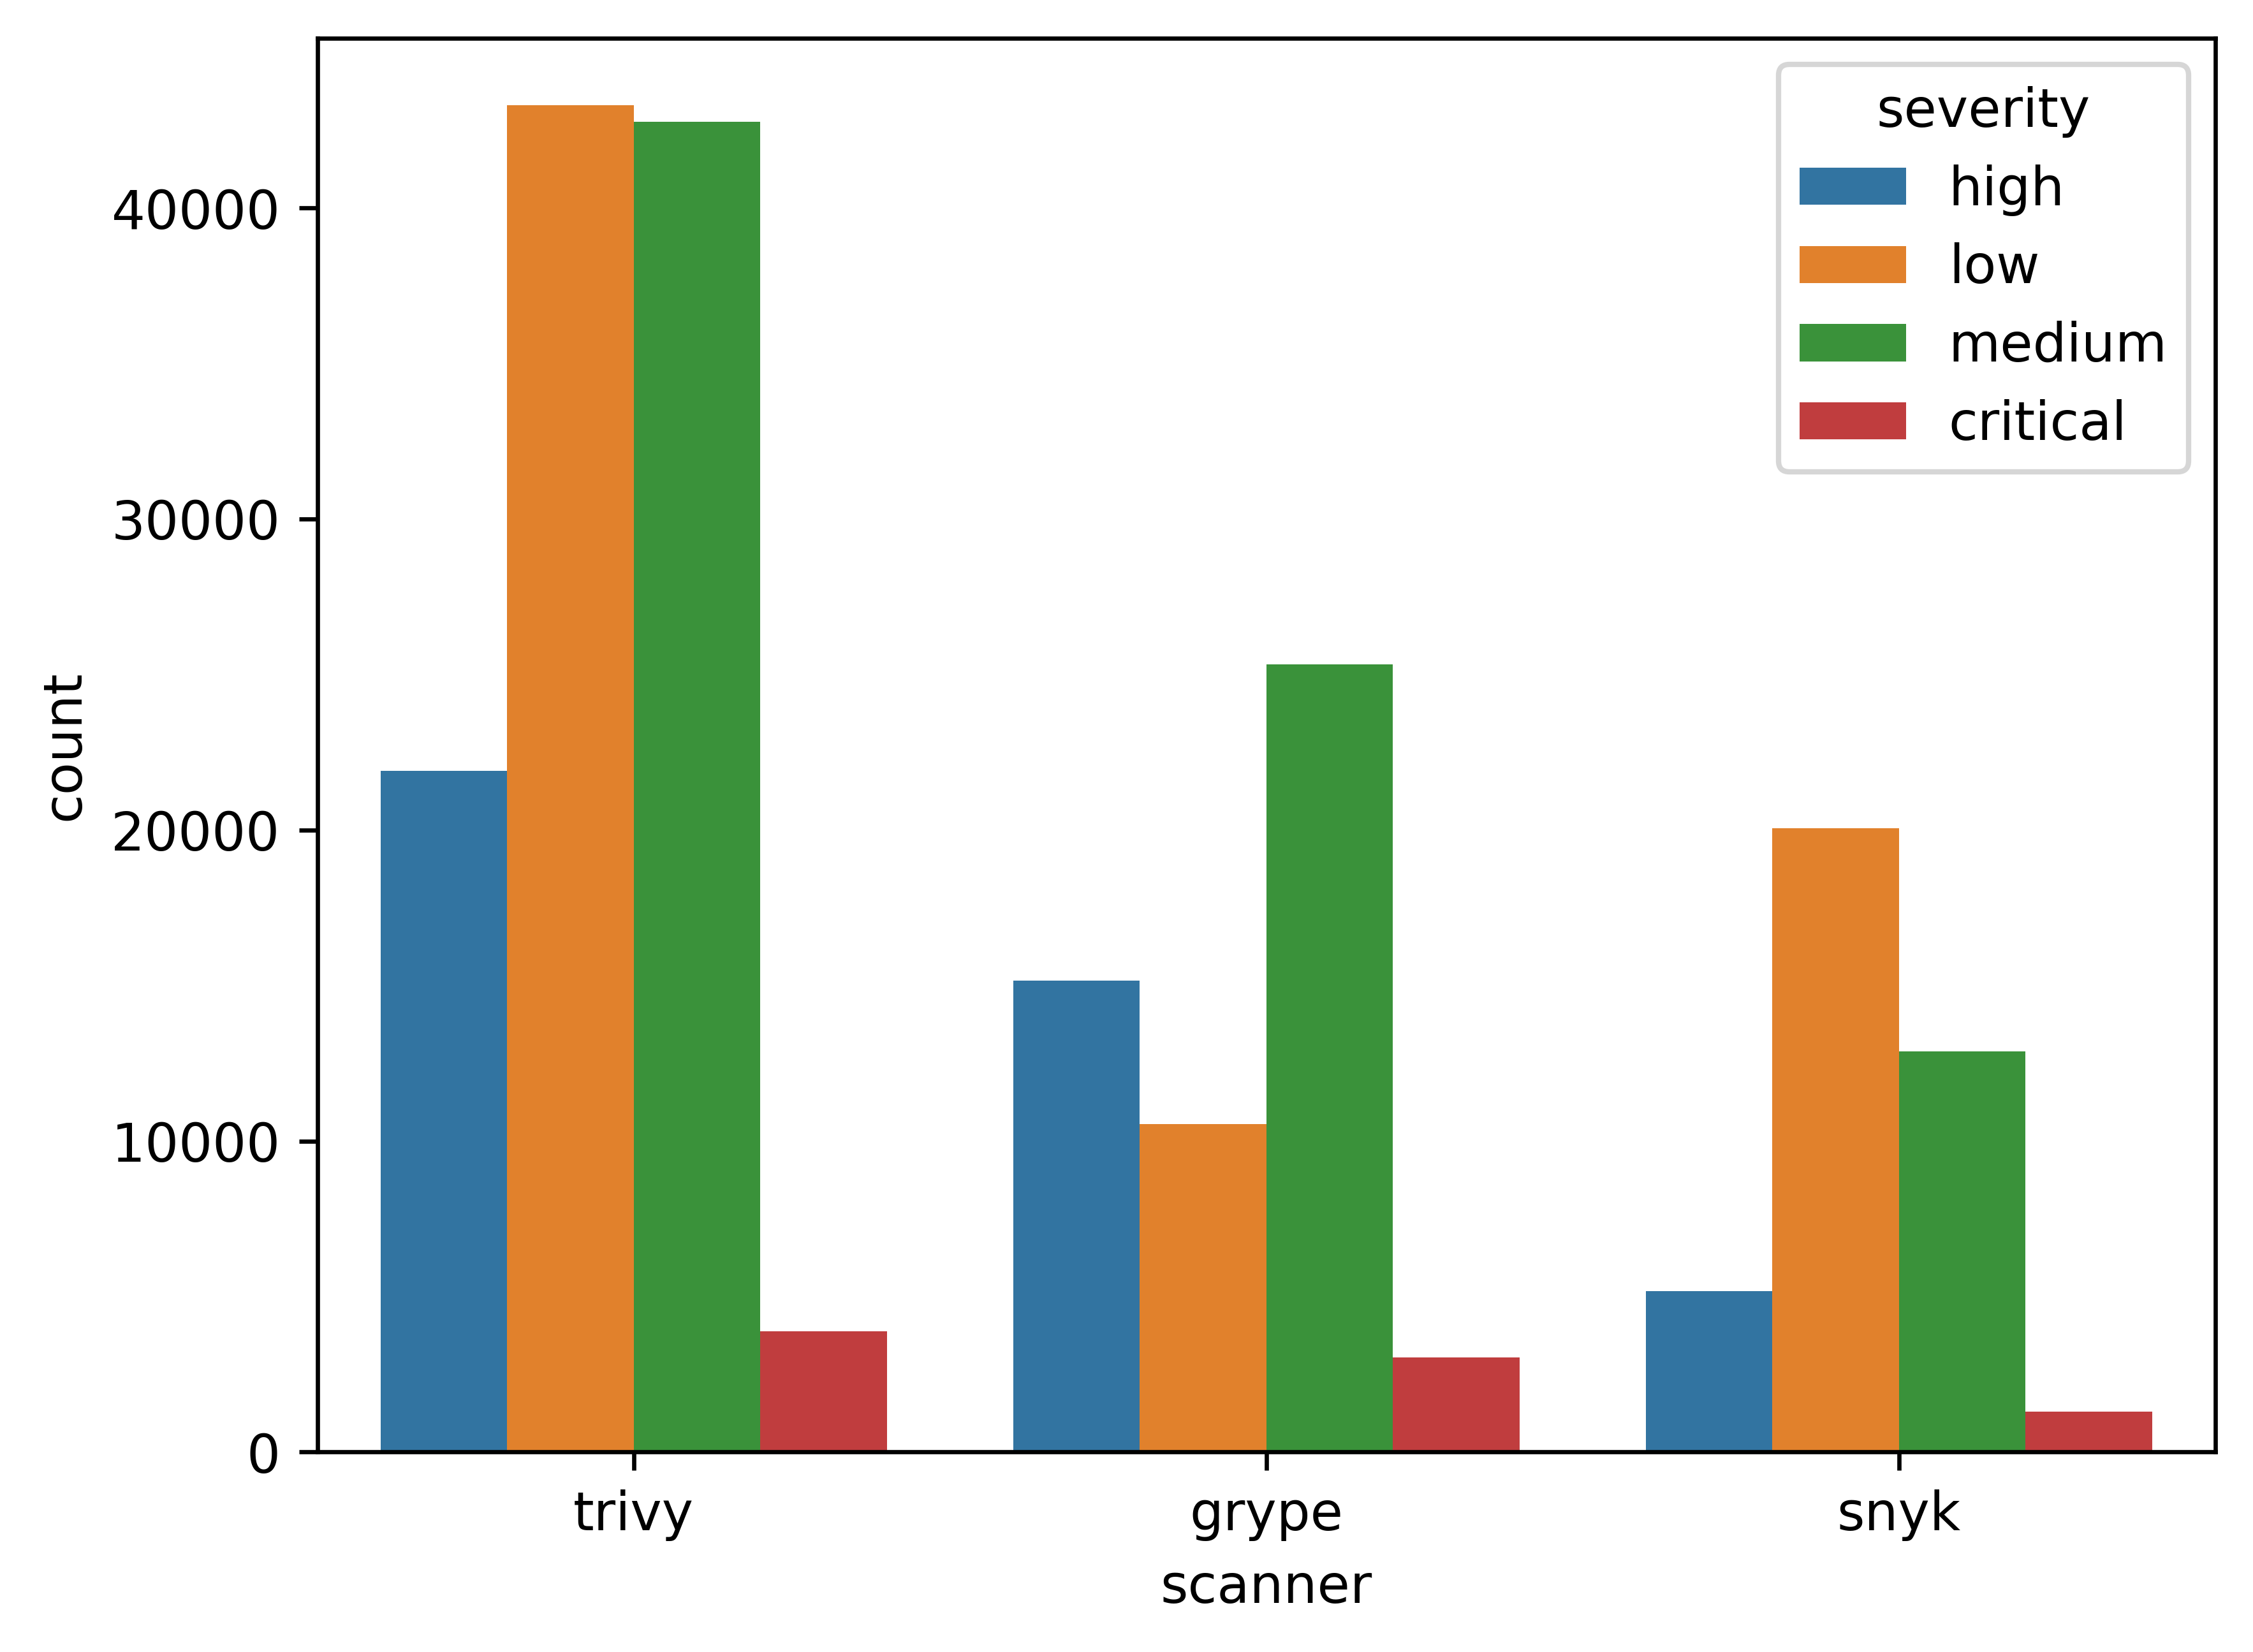

In [11]:
# ax = sns.countplot(df, x="scanner", hue="severity")
# for container in ax.containers:
#     ax.bar_label(container)
sns.countplot(df, x="scanner", hue="severity")

<Axes: xlabel='severity', ylabel='count'>

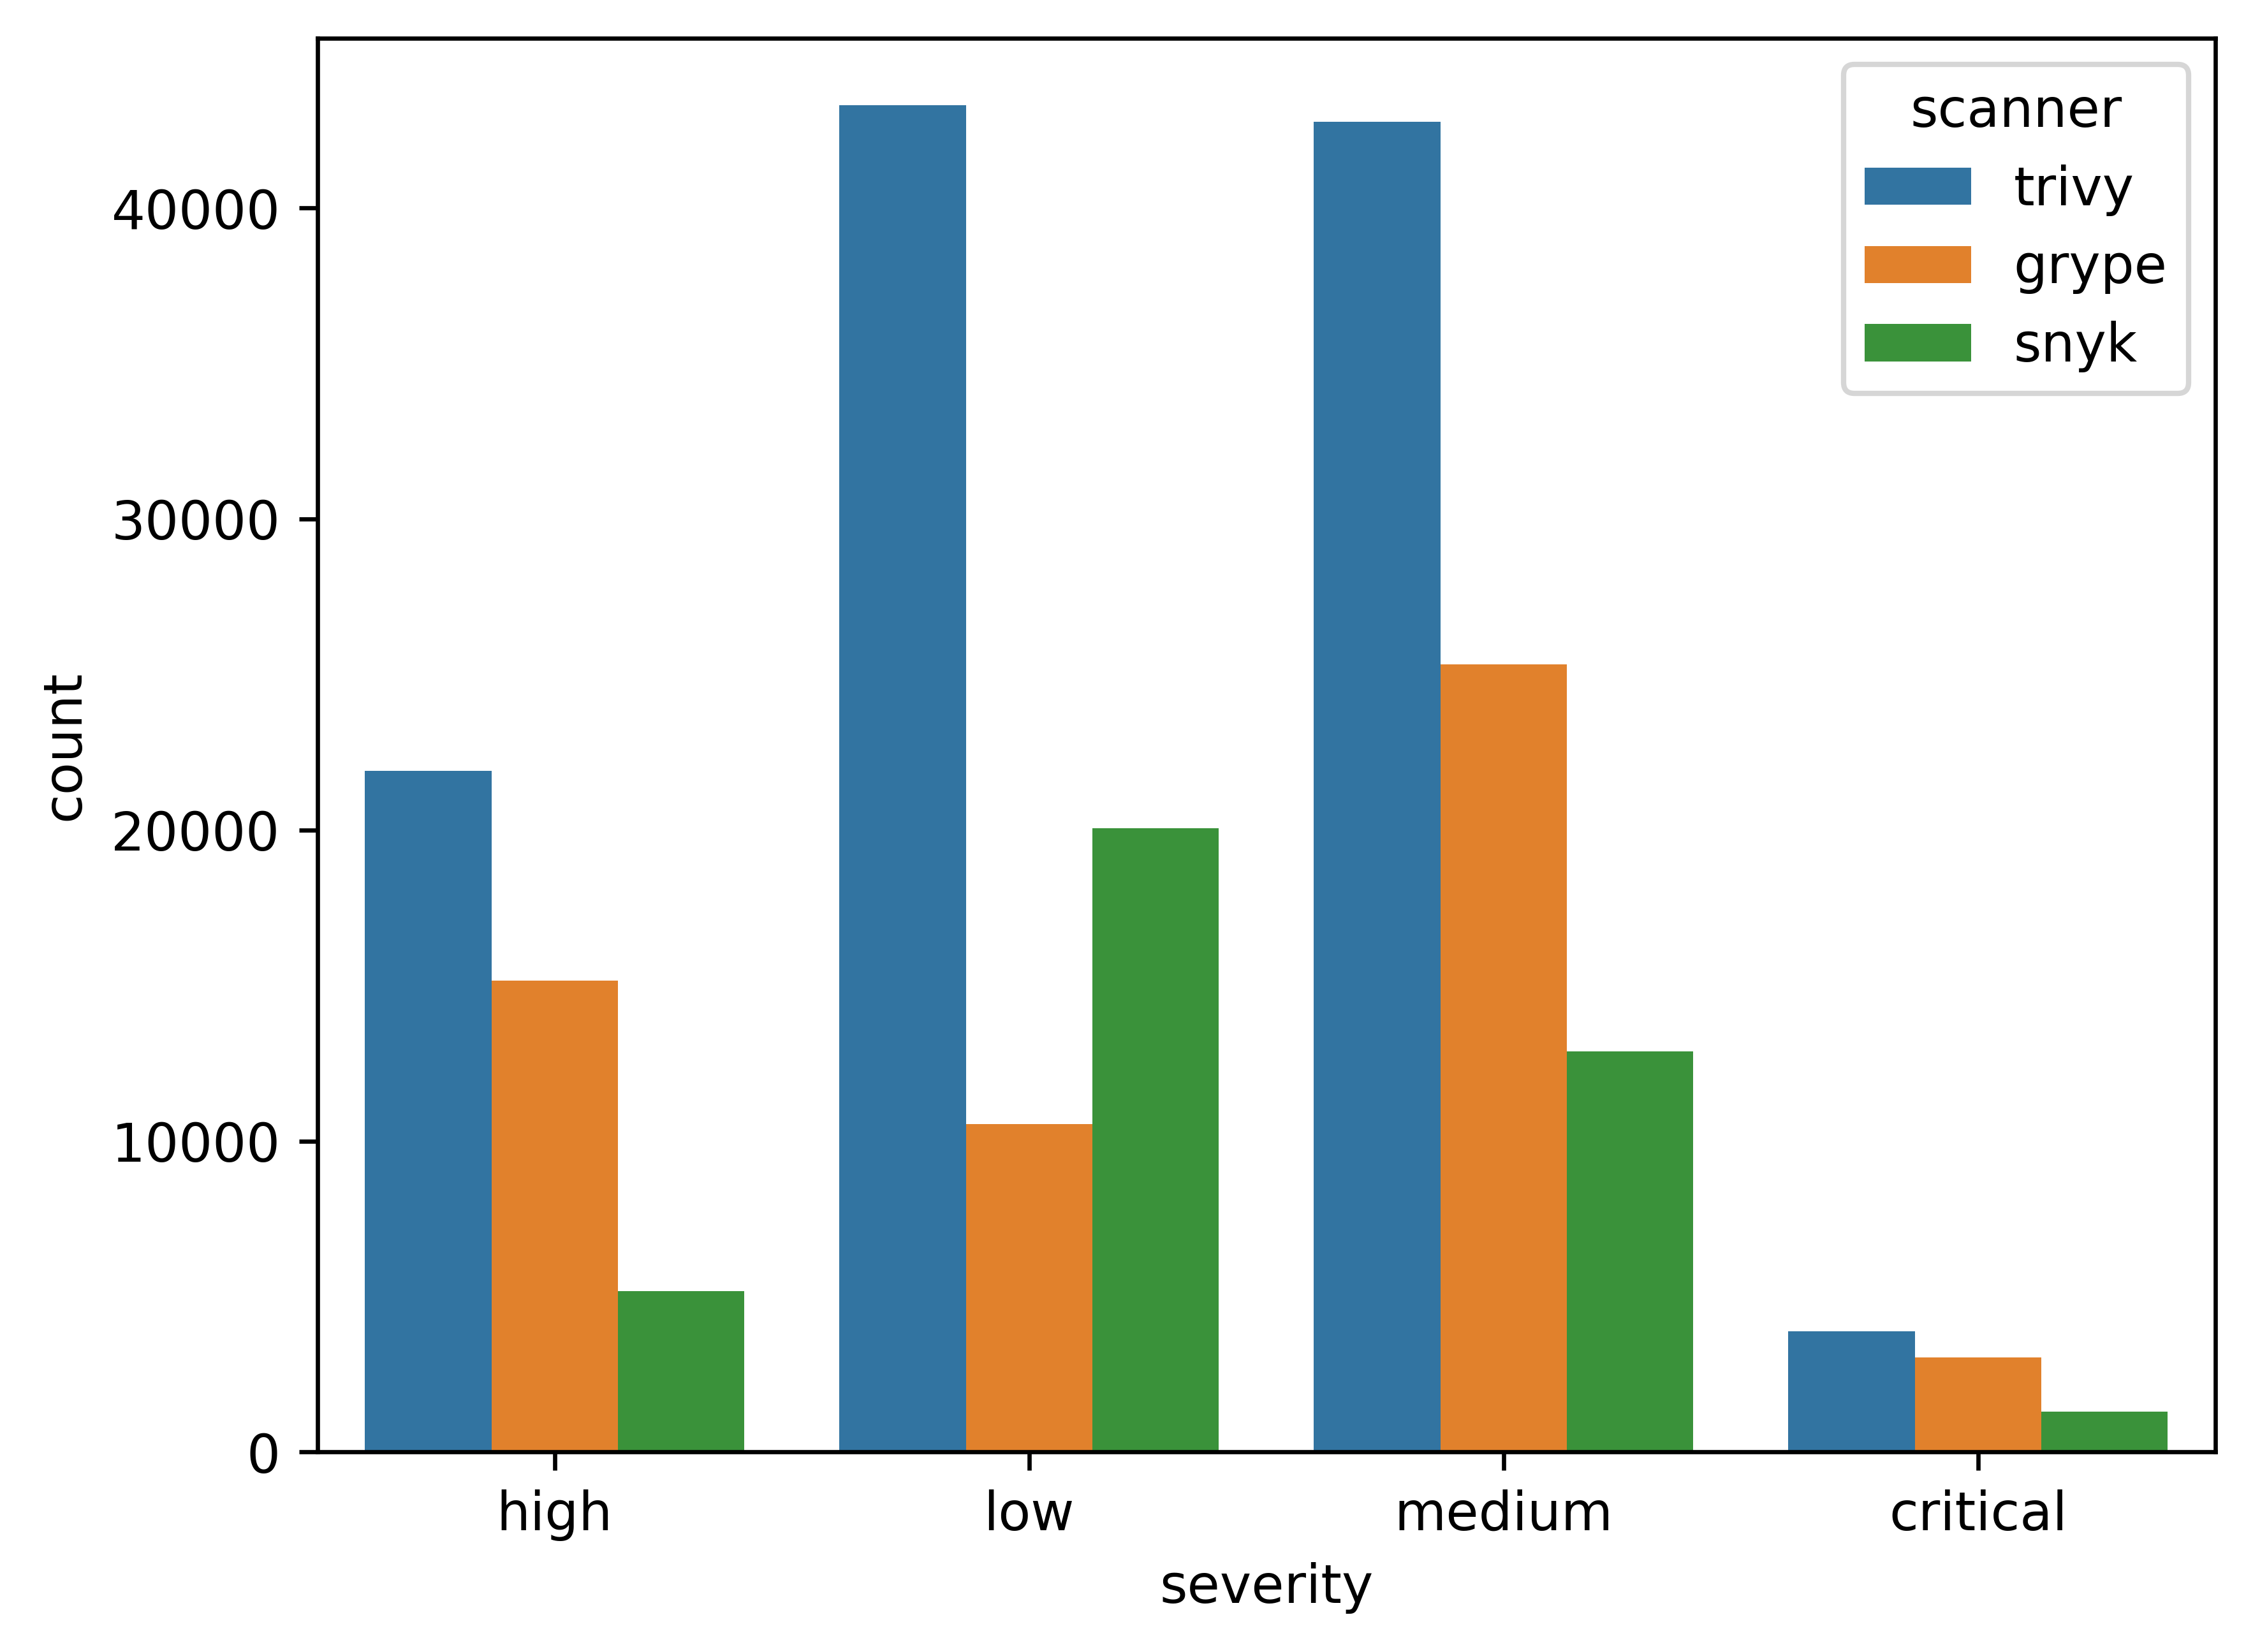

In [12]:
sns.countplot(df, x="severity", hue="scanner")

<Axes: xlabel='scanner', ylabel='count'>

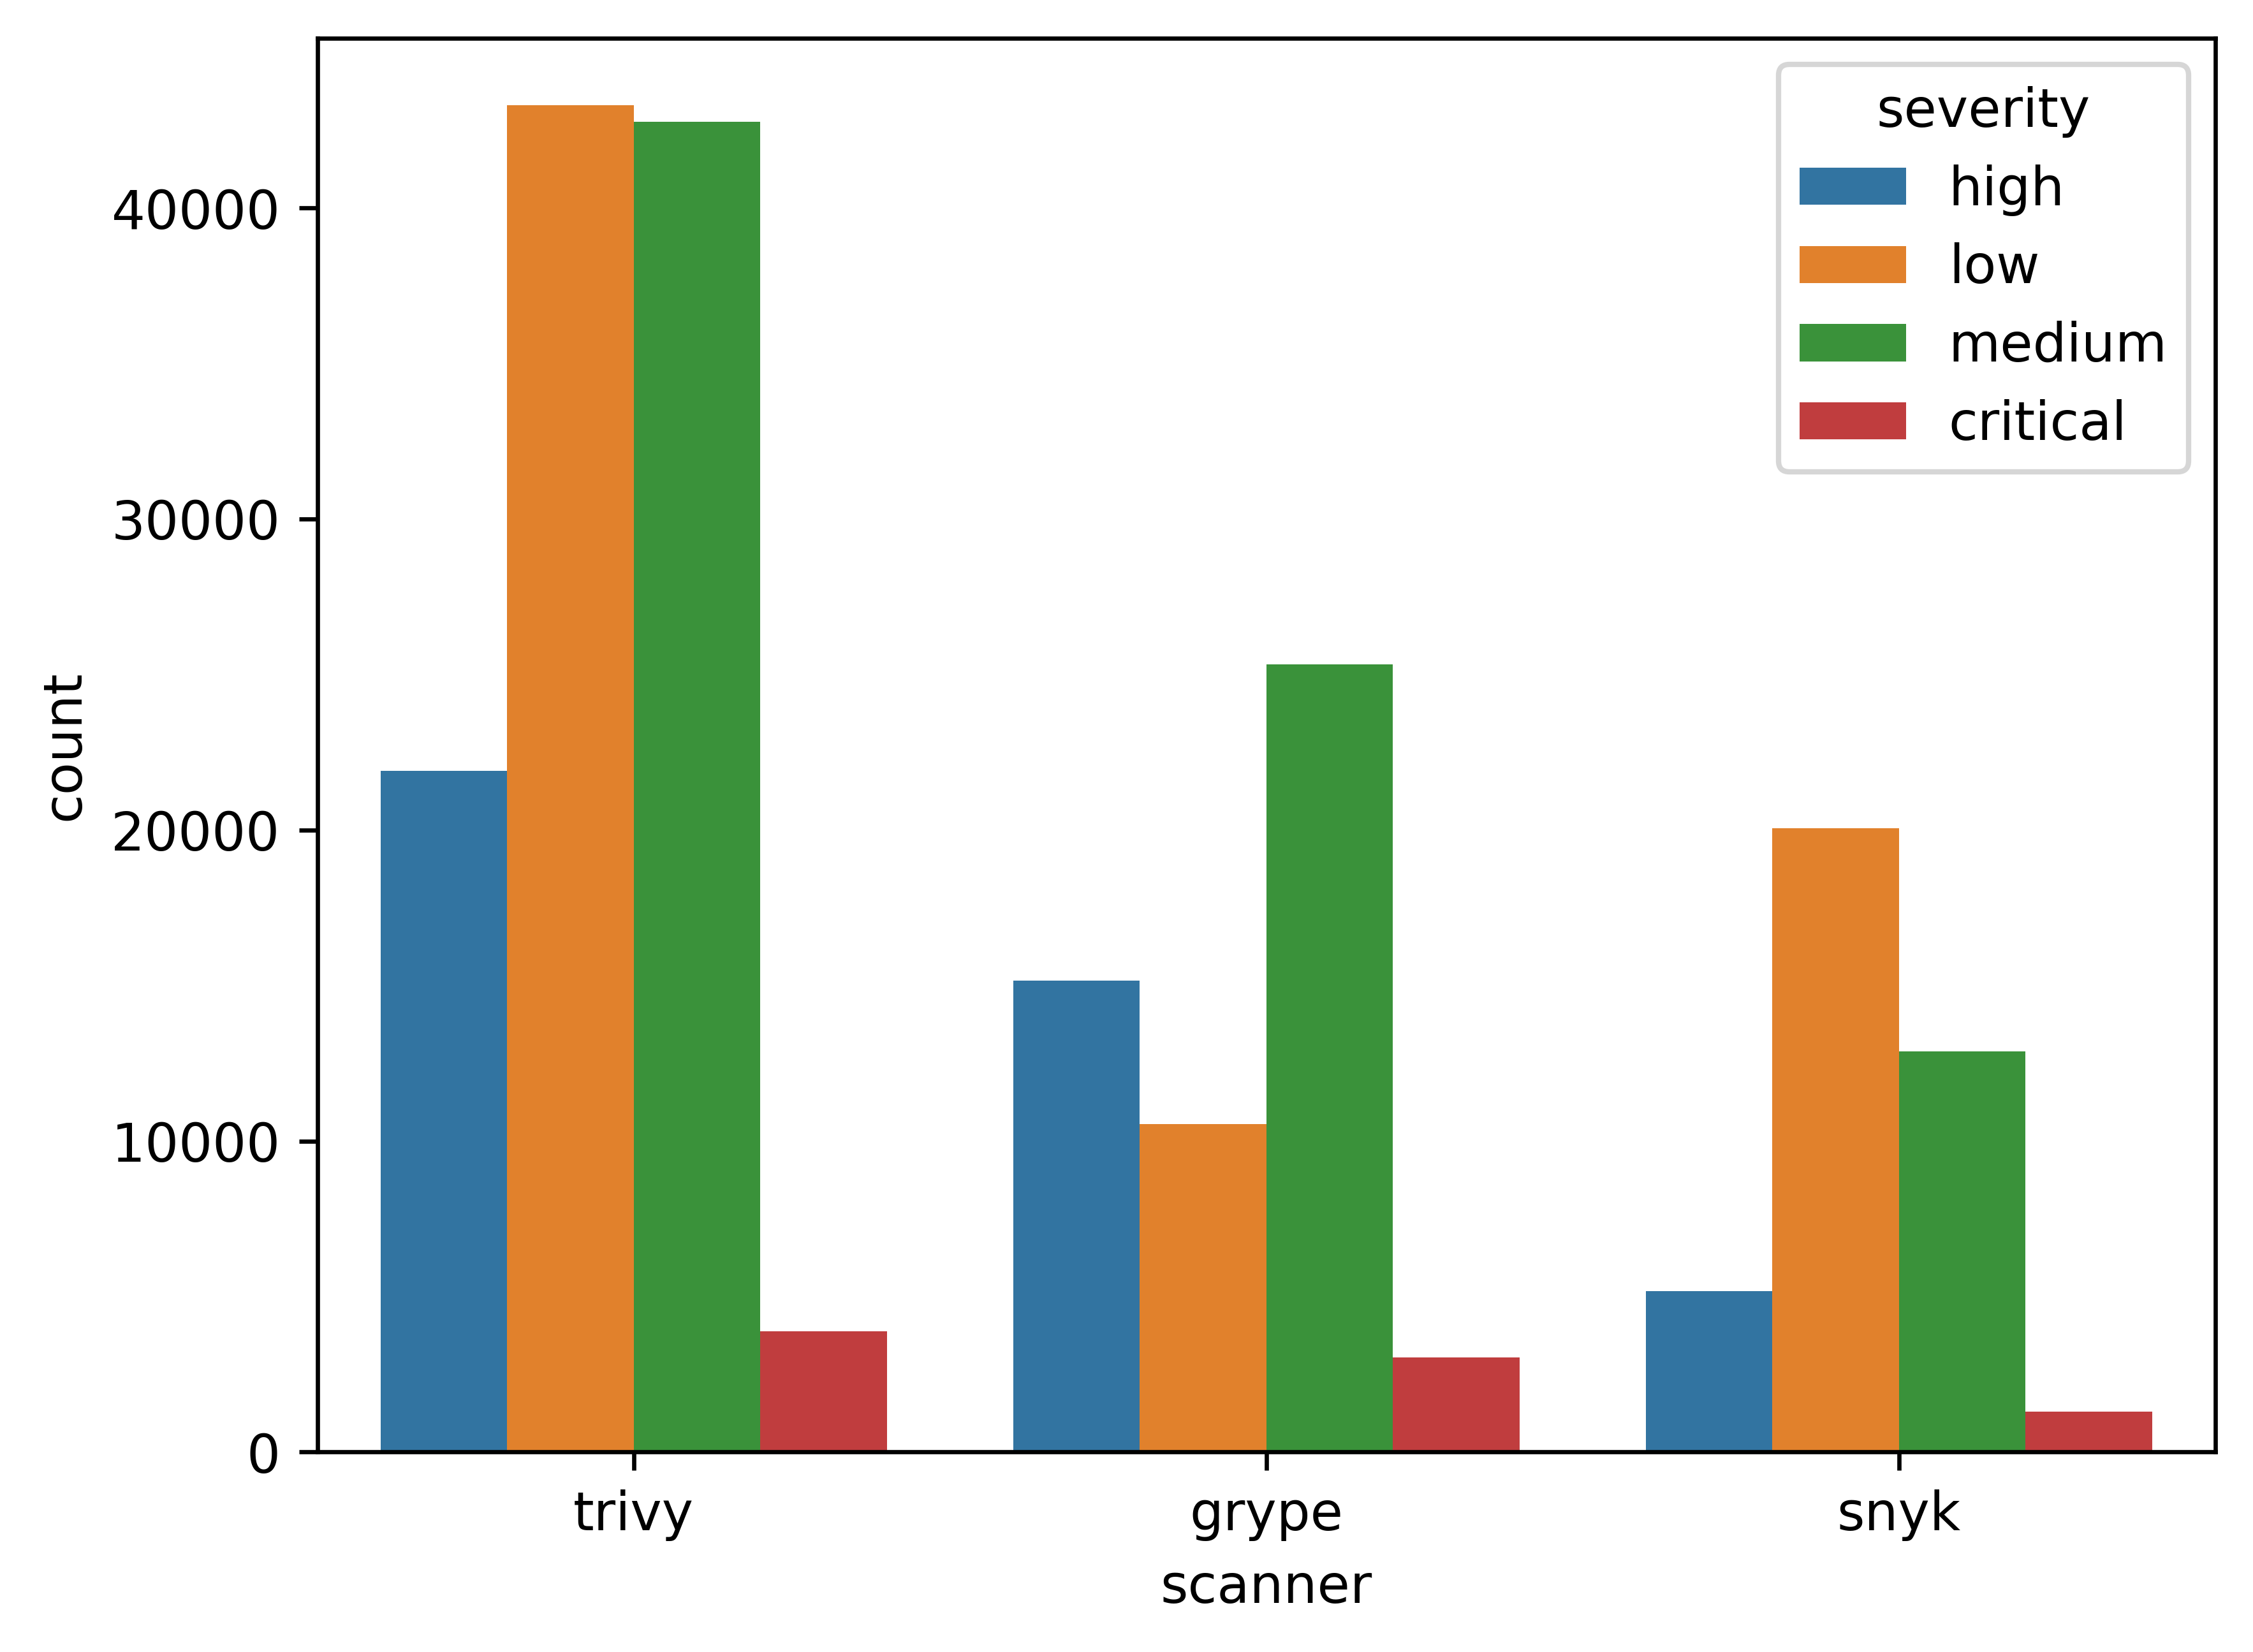

In [13]:
sns.countplot(df, x="scanner", hue="severity")

In [14]:
trivy_vulns = df[df["scanner"] == "trivy"]
grype_vulns = df[df["scanner"] == "grype"]
snyk_vulns = df[df["scanner"] == "snyk"]

In [15]:
trivy_vulns = trivy_vulns.drop_duplicates()
grype_vulns = grype_vulns.drop_duplicates()
snyk_vulns = snyk_vulns.drop_duplicates()

In [16]:
trivy_uniq_vulns = trivy_vulns[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()
grype_uniq_vulns = grype_vulns[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()
snyk_uniq_vulns = snyk_vulns[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()

Toplamda uniq zafiyetler

In [17]:
vulns = df[["image", "id", "pkgname", "pkgversion", "severity"]].drop_duplicates()
len(vulns[["image", "id", "pkgname", "pkgversion"]].drop_duplicates())

166846

<Axes: xlabel='severity', ylabel='count'>

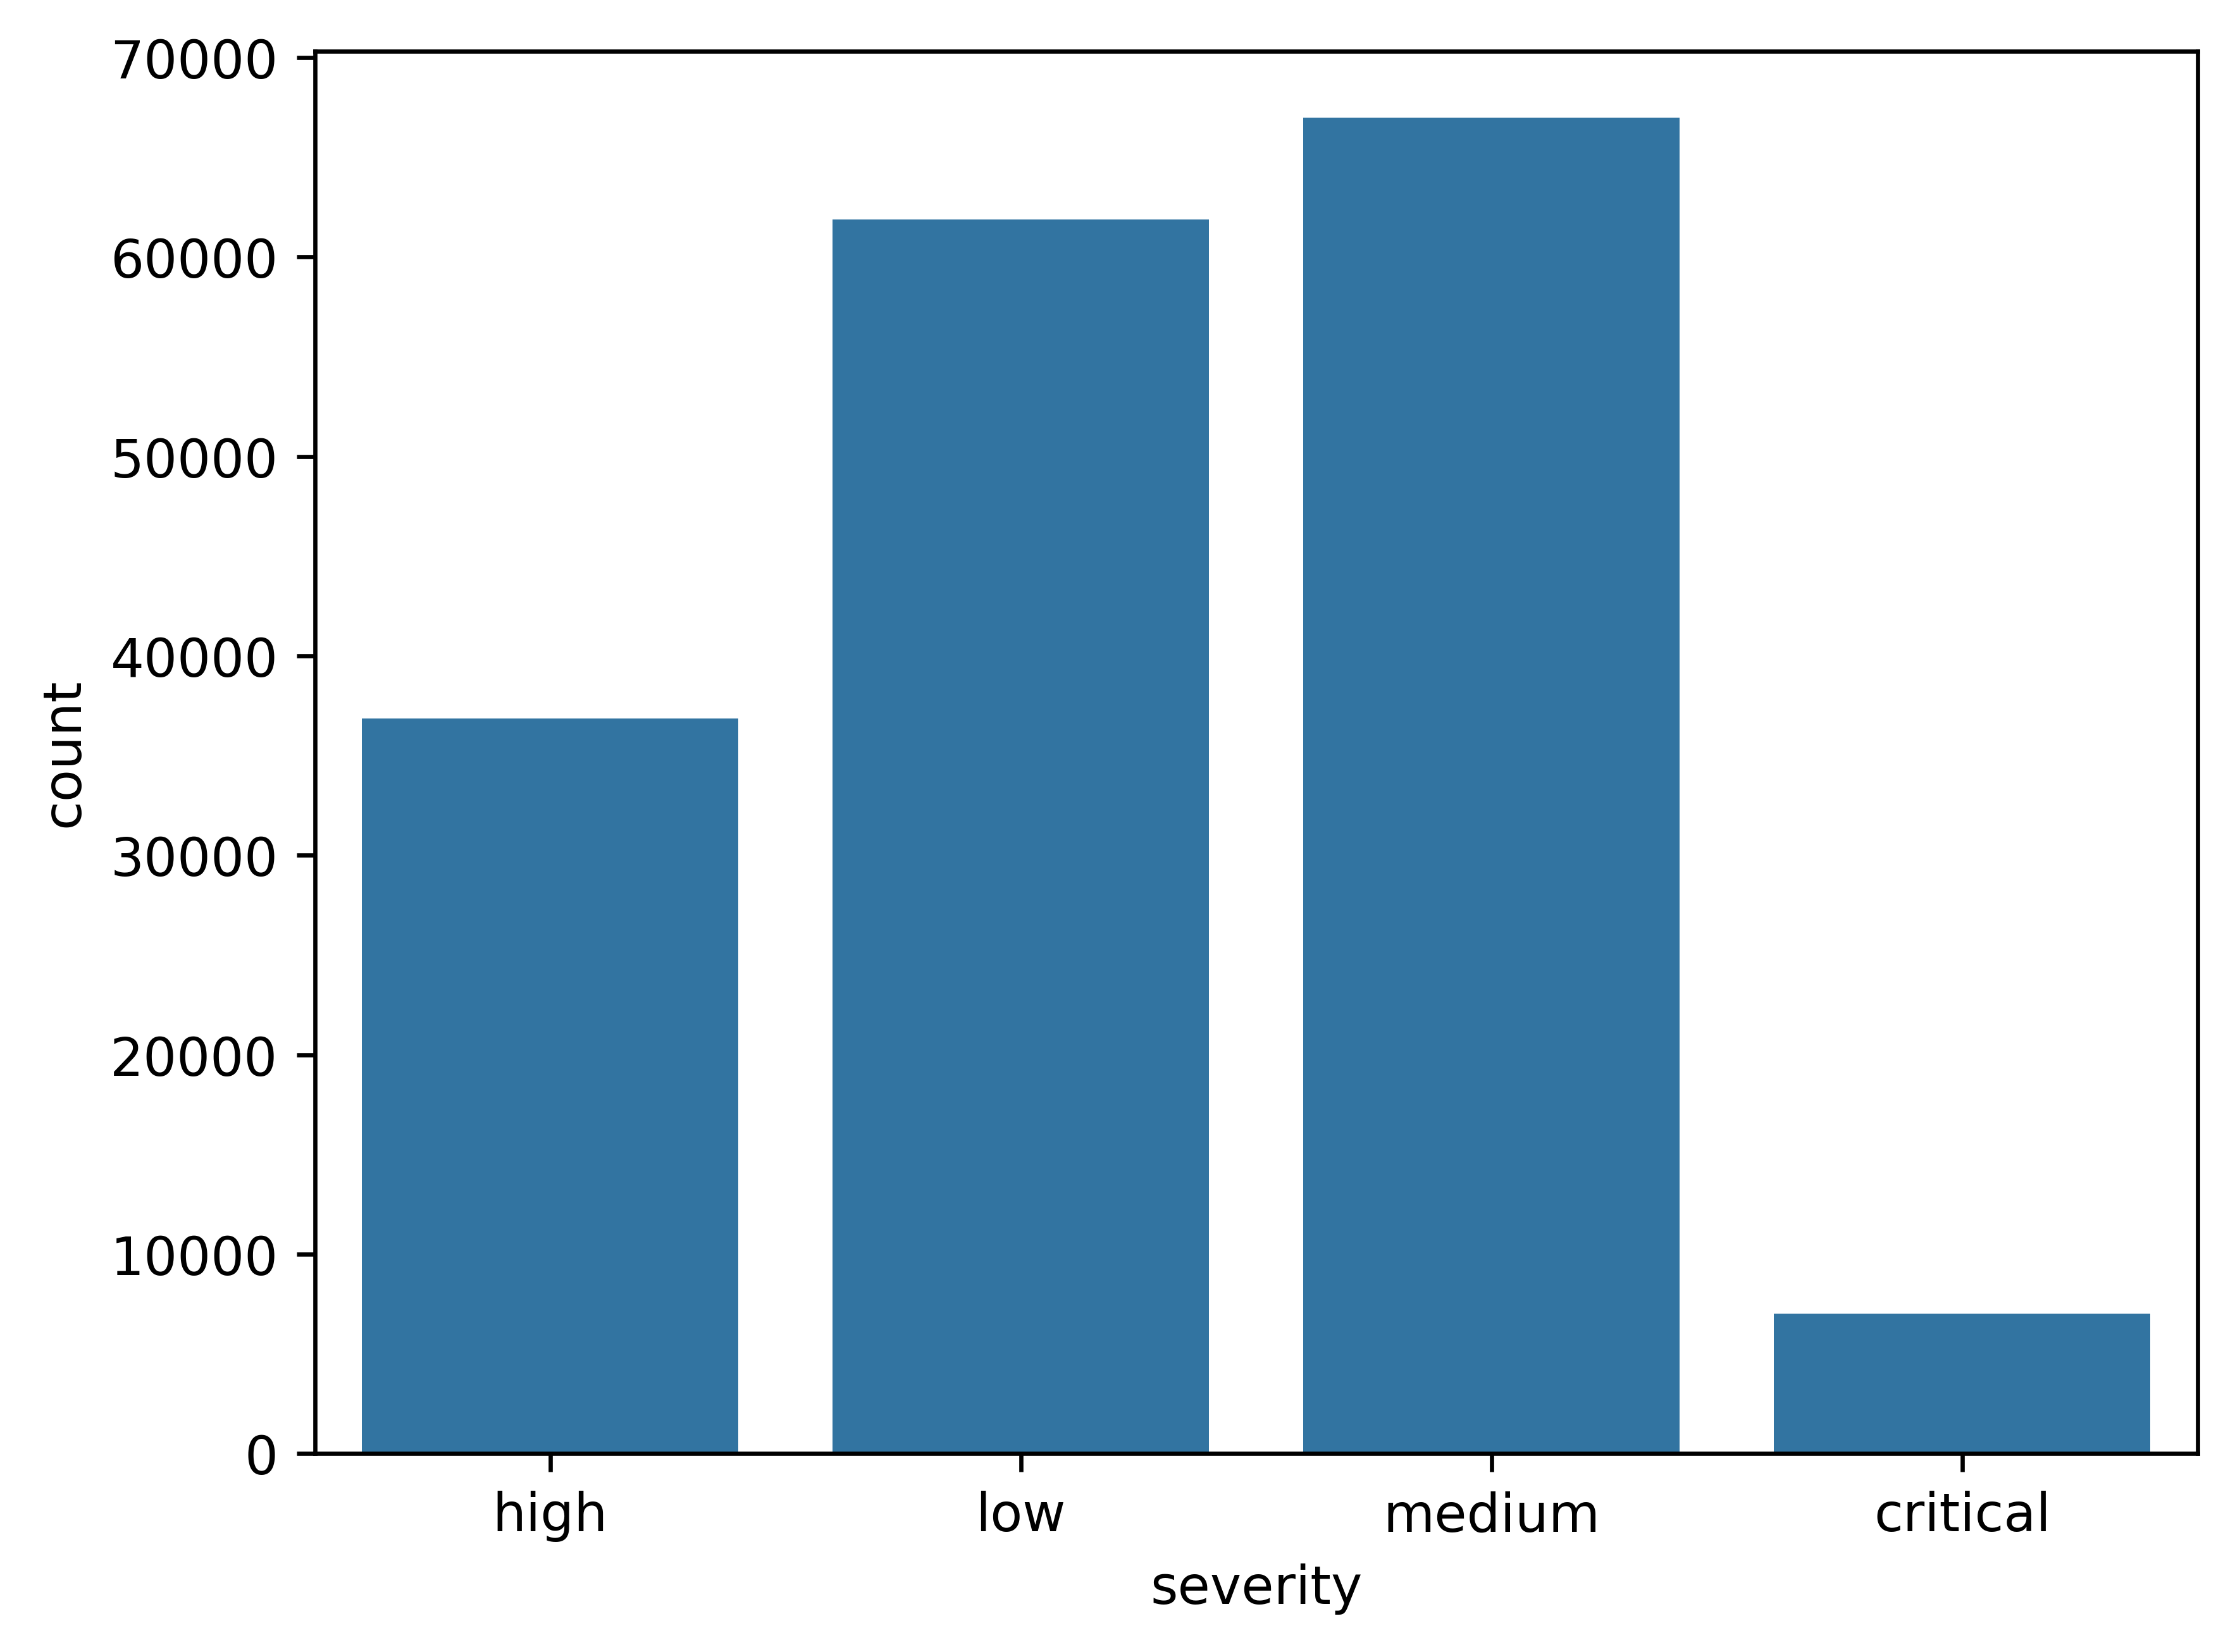

In [18]:
sns.countplot(vulns, x="severity")

Zafiyet istatikstikleri

In [19]:
print(f"Total vulnerability count: {len(vulns)}")
print(f"Trivy Hit: {len(trivy_uniq_vulns)}, Trivy miss: {len(vulns) - len(trivy_uniq_vulns)}")
print(f"Grype Hit: {len(grype_uniq_vulns)}, Grype miss: {len(vulns) - len(grype_uniq_vulns)}")
print(f"Snyk Hit: {len(snyk_uniq_vulns)}, Snyk miss: {len(vulns) - len(snyk_uniq_vulns)}")

Total vulnerability count: 172736
Trivy Hit: 111865, Trivy miss: 60871
Grype Hit: 54099, Grype miss: 118637
Snyk Hit: 39430, Snyk miss: 133306


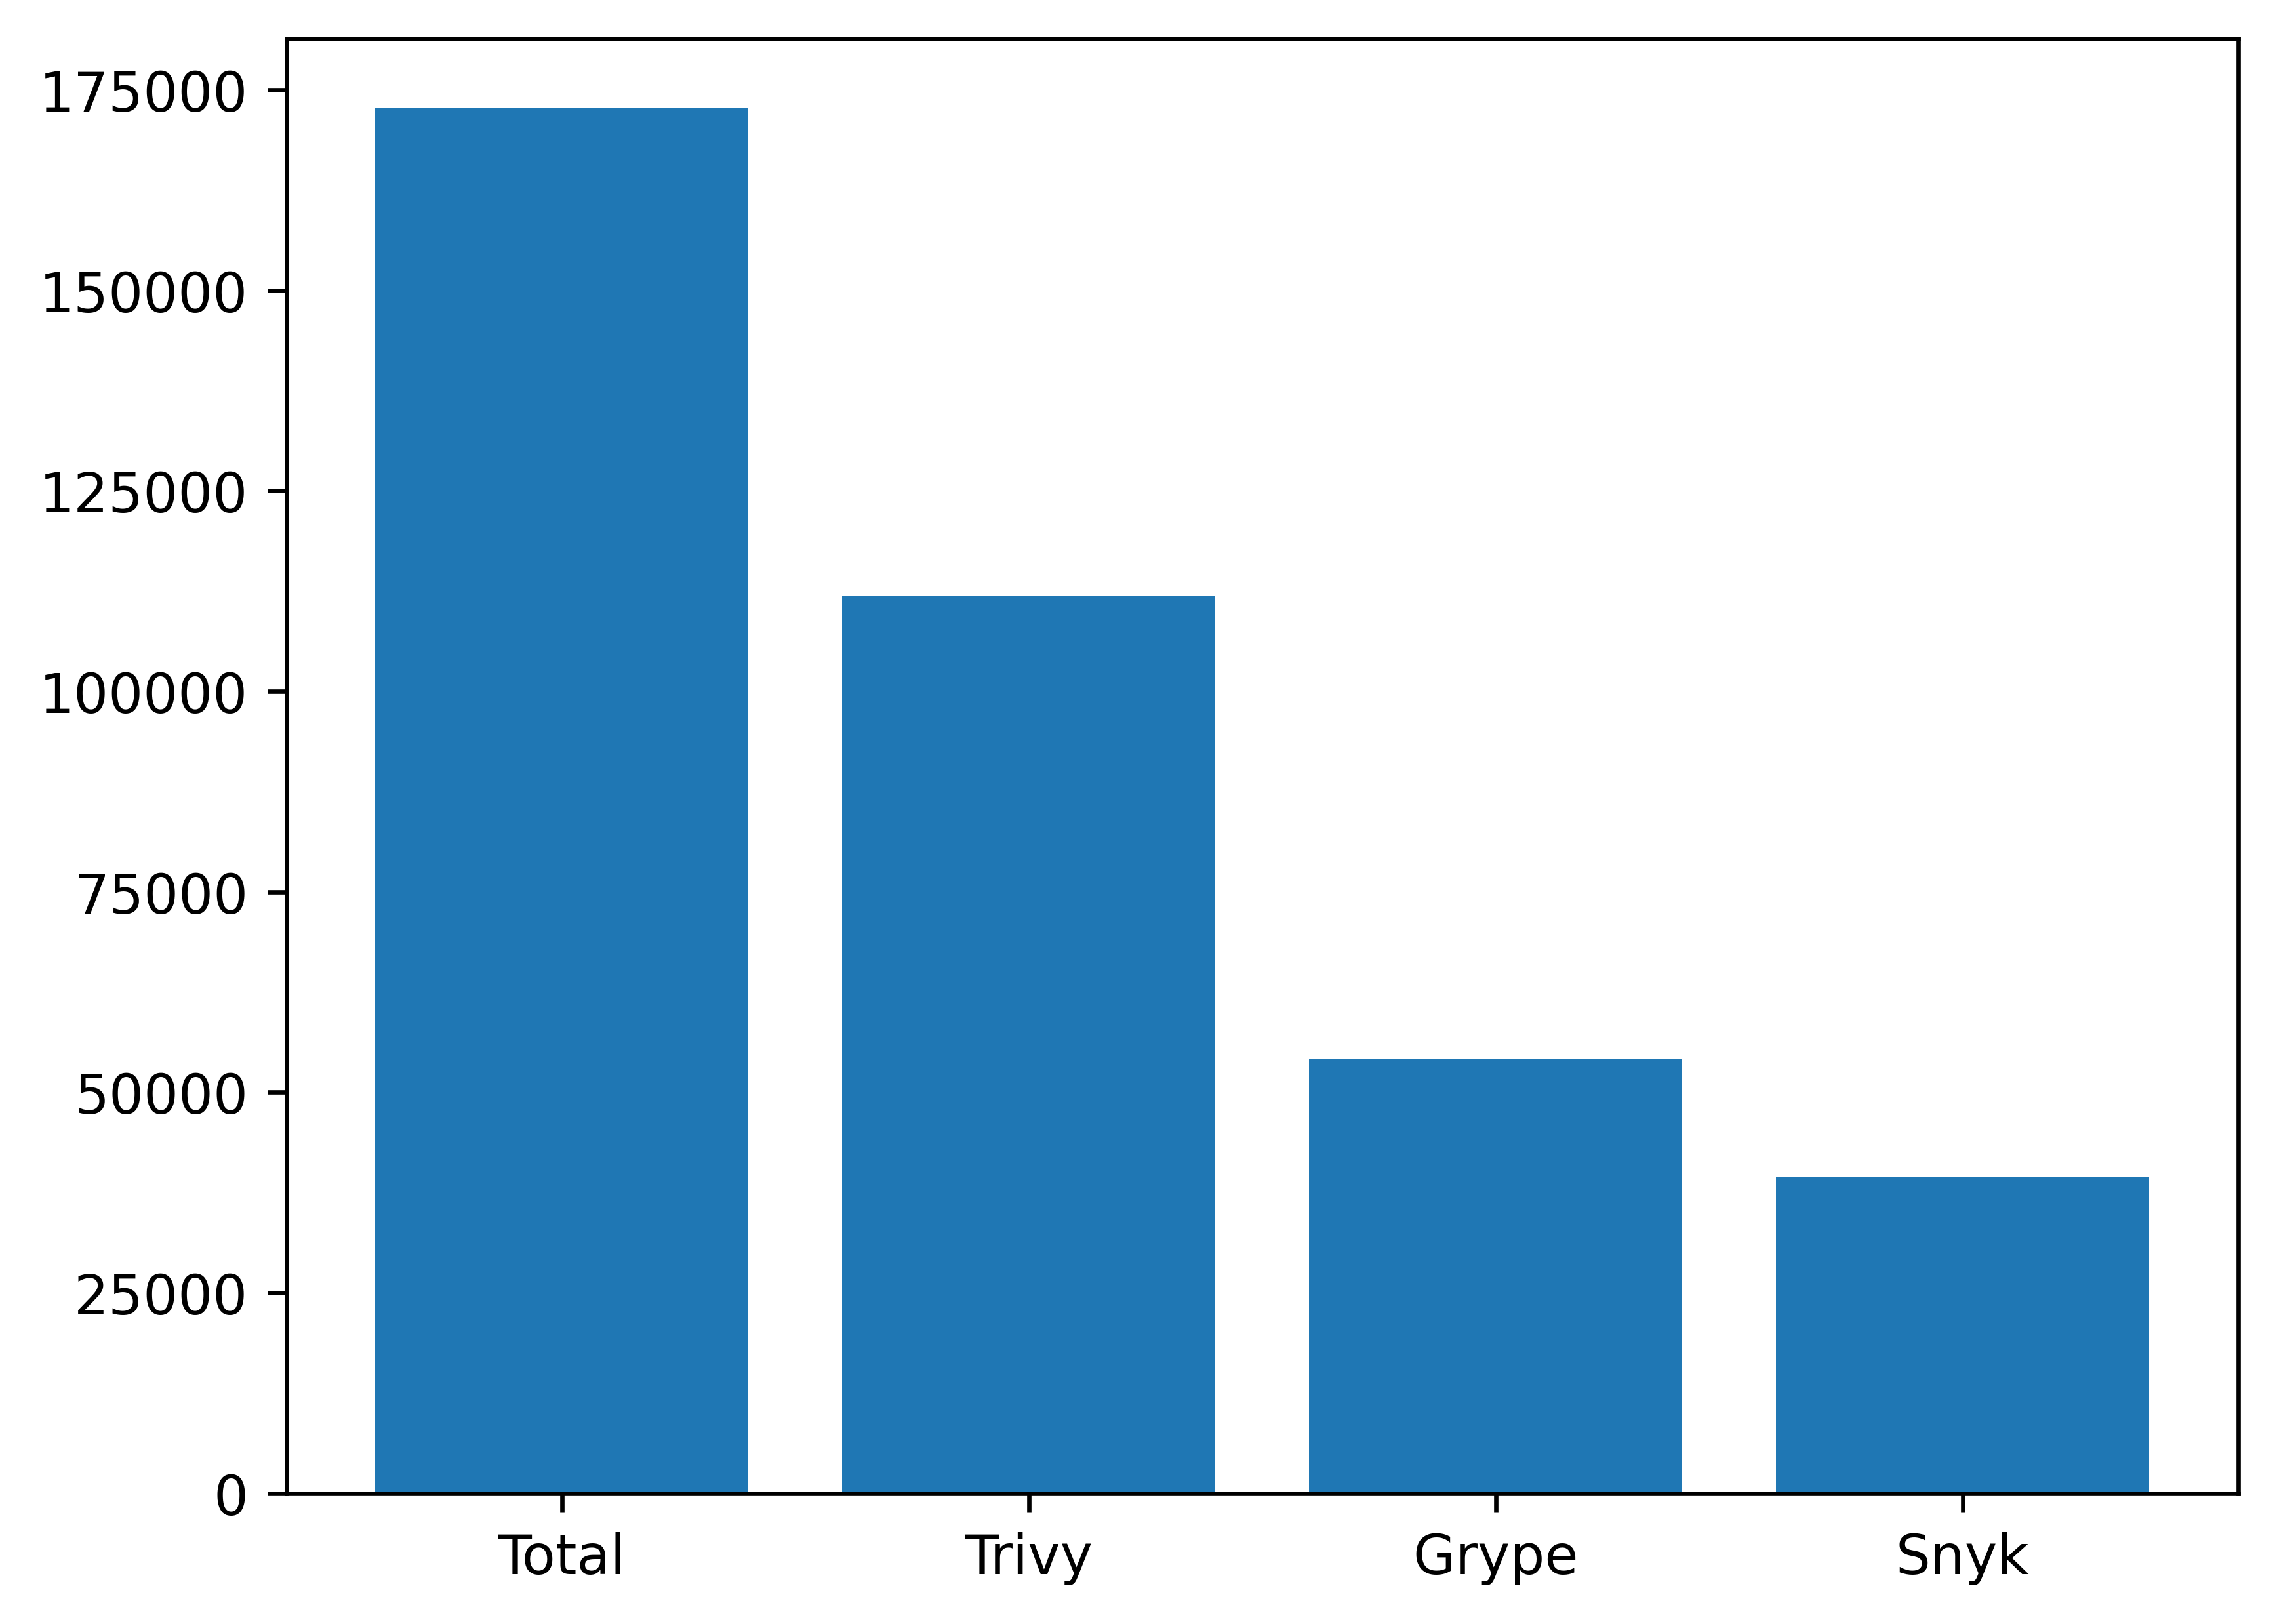

In [20]:
fig, ax = plt.subplots()
scanners = ['Total', 'Trivy', 'Grype', 'Snyk']
counts = [len(vulns), len(trivy_uniq_vulns), len(grype_uniq_vulns), len(snyk_uniq_vulns)]
ax.bar(scanners, counts)
plt.show()

# Metrik

In [21]:
print(f"Total vulnerability count: {len(vulns)}")

trivy_vuln_sum = round(trivy_vulns['score'].sum(), 4)
grype_vuln_sum = round(grype_vulns['score'].sum(), 4)
snyk_vuln_sum = round(snyk_vulns['score'].sum(), 4)

print(f"trivy_vuln_sum:{trivy_vuln_sum} grype_vuln_sum:{grype_vuln_sum} snyk_vuln_sum:{snyk_vuln_sum}")

Total vulnerability count: 172736
trivy_vuln_sum:736142.5 grype_vuln_sum:319417.0 snyk_vuln_sum:256872.0


## Vulnerability Score Metric (VSM)

In [22]:
trivy_vuln_sum_new_metric = trivy_vuln_sum / (len(vulns) * 10)
grype_vuln_sum_new_metric = grype_vuln_sum / (len(vulns) * 10)
snyk_vuln_sum_new_metric = snyk_vuln_sum  / (len(vulns) * 10)

print(f"trivy metric:", trivy_vuln_sum_new_metric)
print(f"grype metric:", grype_vuln_sum_new_metric)
print(f"snyk metric:",  snyk_vuln_sum_new_metric)

trivy metric: 0.42616623054835123
grype metric: 0.18491628844016303
snyk metric: 0.1487078547610226


In [23]:
print("t/g:", trivy_vuln_sum_new_metric / grype_vuln_sum_new_metric)
print("t/s:", trivy_vuln_sum_new_metric / snyk_vuln_sum_new_metric)
print("g/s:", grype_vuln_sum_new_metric / snyk_vuln_sum_new_metric)

t/g: 2.304644085944079
t/s: 2.8657950263166088
g/s: 1.243487028558971


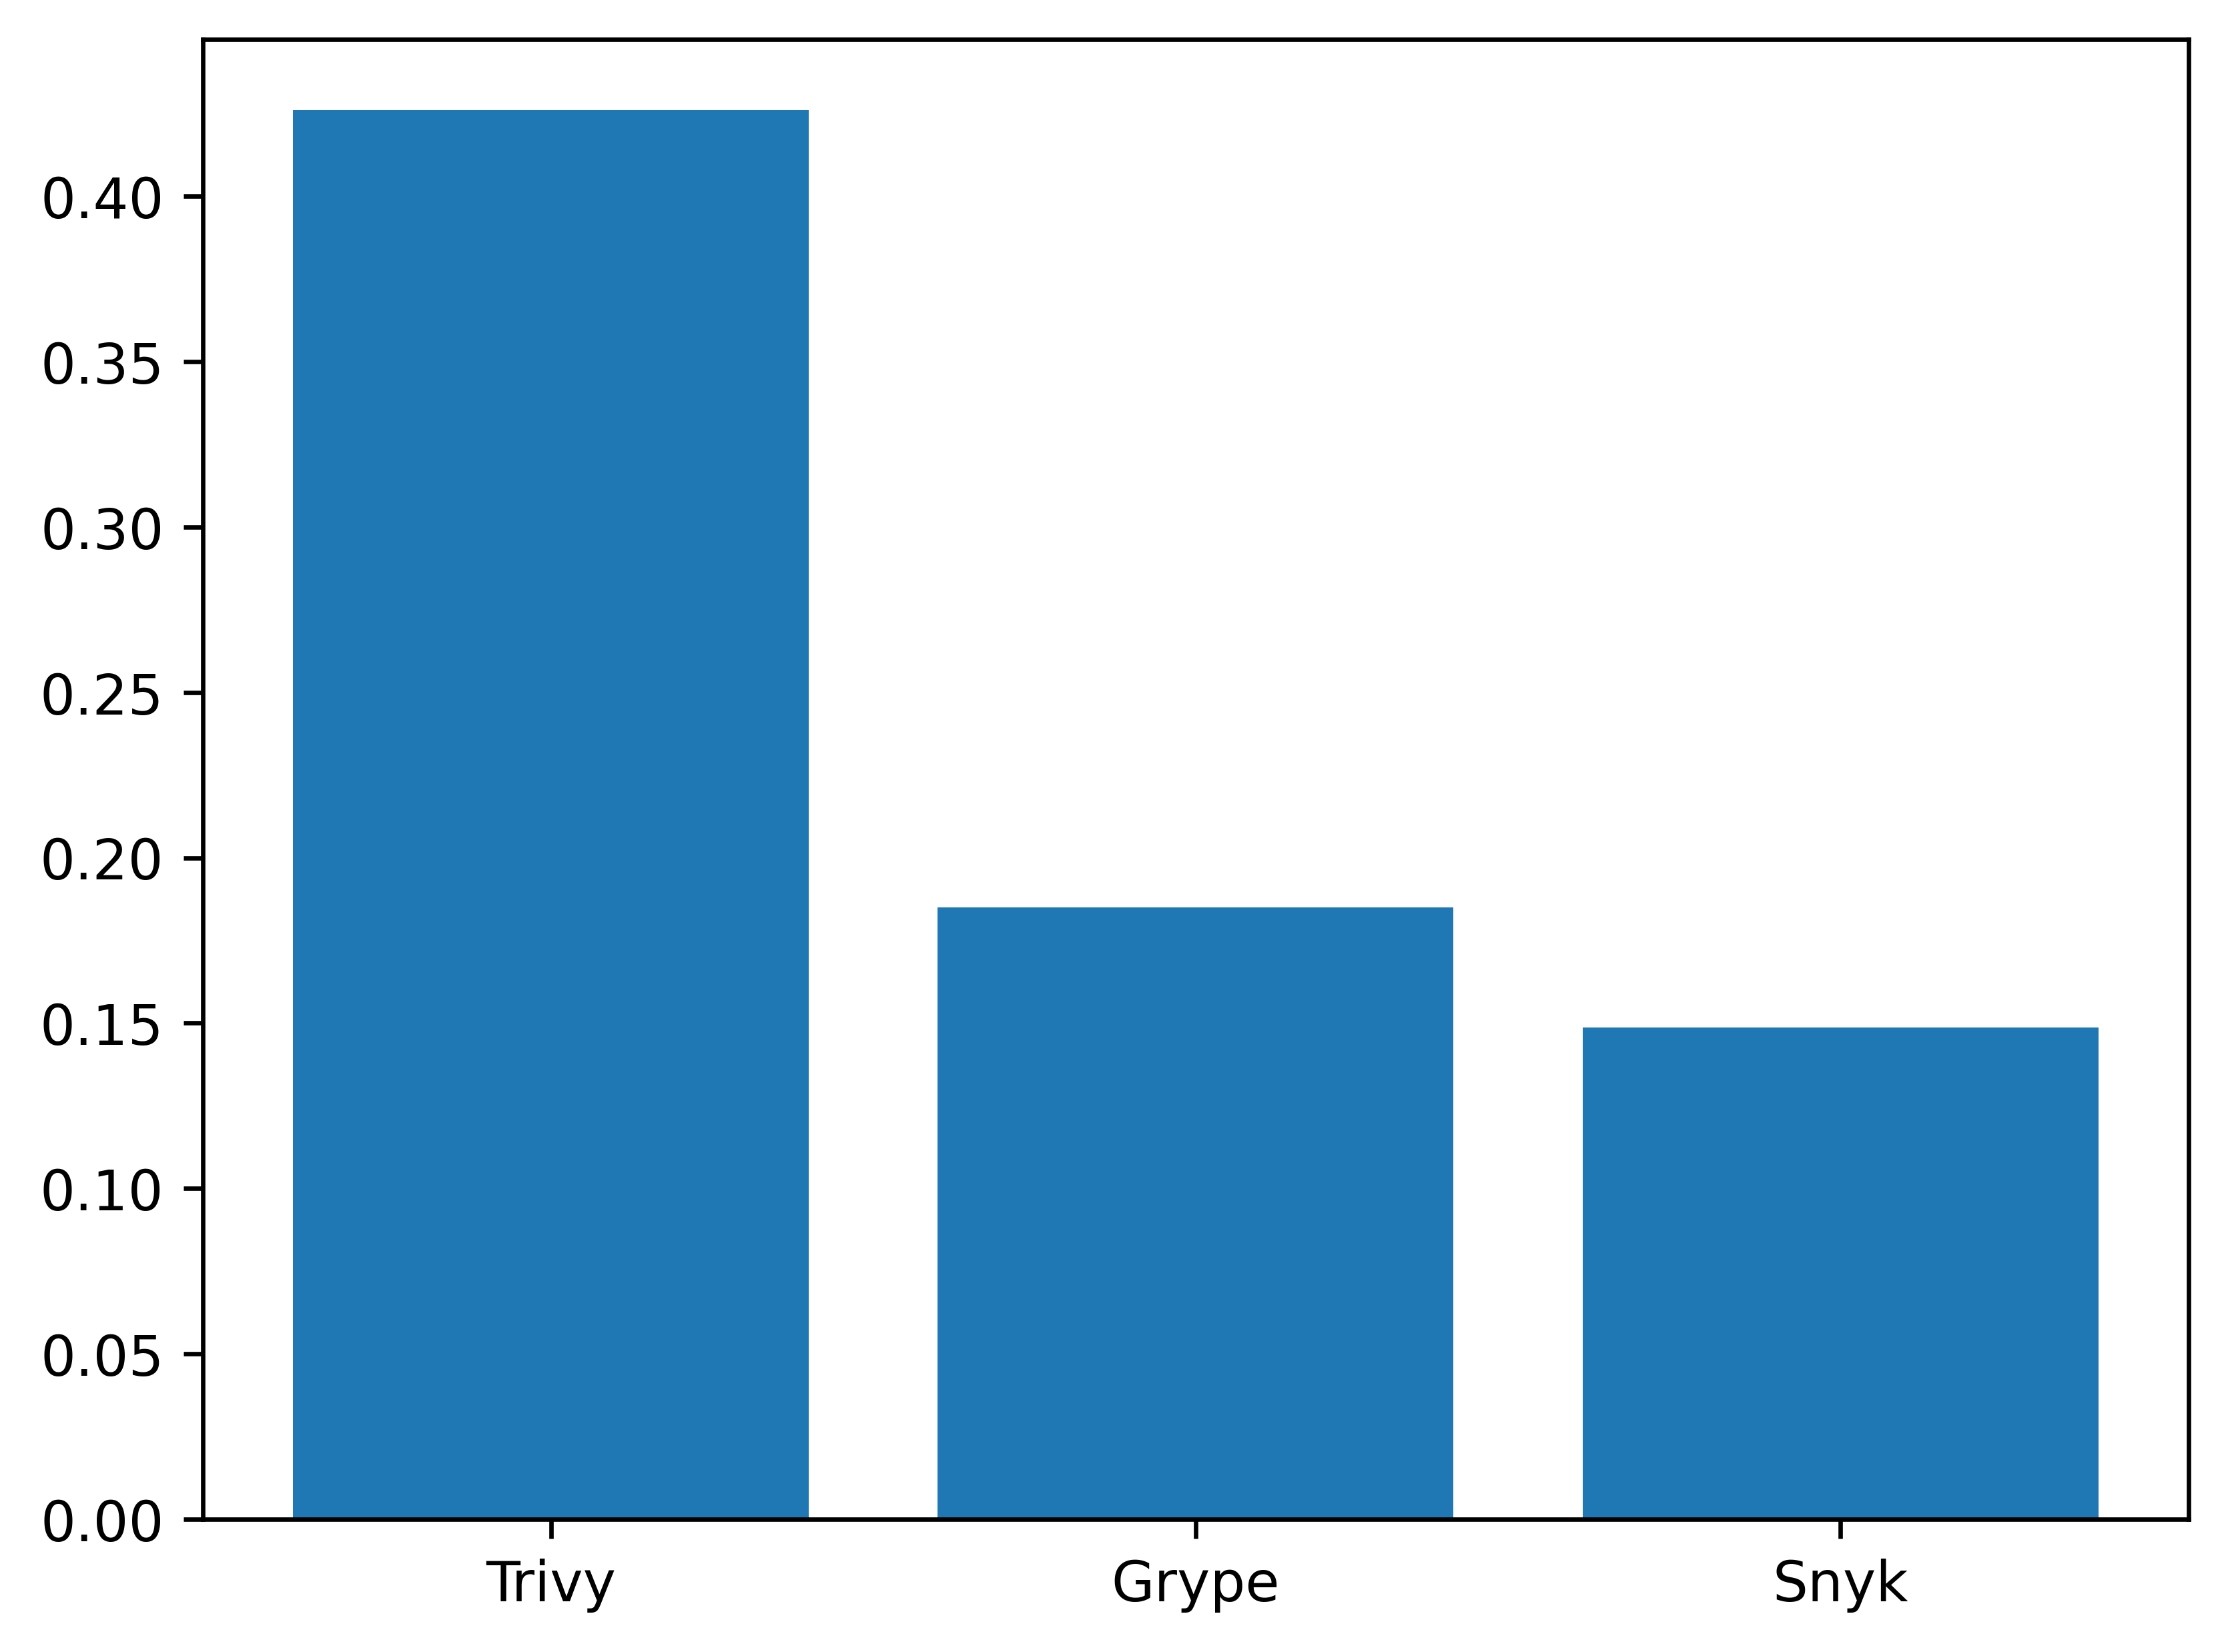

In [24]:
fig, ax = plt.subplots()
scanners = ['Trivy', 'Grype', 'Snyk']
counts = [trivy_vuln_sum_new_metric, grype_vuln_sum_new_metric, snyk_vuln_sum_new_metric]
ax.bar(scanners, counts)
plt.show()

## Hit and miss metric (HMM)

In [25]:
trivy_uniq_vulns_javed = len(trivy_uniq_vulns) / len(vulns)
grype_uniq_vulns_javed = len(grype_uniq_vulns) / len(vulns)
snyk_uniq_vulns_javed = len(snyk_uniq_vulns) / len(vulns)

print(f"Trivy Hit: {trivy_uniq_vulns_javed}")
print(f"Grype Hit: {grype_uniq_vulns_javed}")
print(f"Snyk Hit:  {snyk_uniq_vulns_javed}")

Trivy Hit: 0.6476067525009263
Grype Hit: 0.3131889125602075
Snyk Hit:  0.22826741385698407


In [26]:
print("t/g:", trivy_uniq_vulns_javed / grype_uniq_vulns_javed)
print("t/s:", trivy_uniq_vulns_javed / snyk_uniq_vulns_javed)
print("g/s:", grype_uniq_vulns_javed / snyk_uniq_vulns_javed)

t/g: 2.0677831383204865
t/s: 2.837053005325894
g/s: 1.3720263758559472


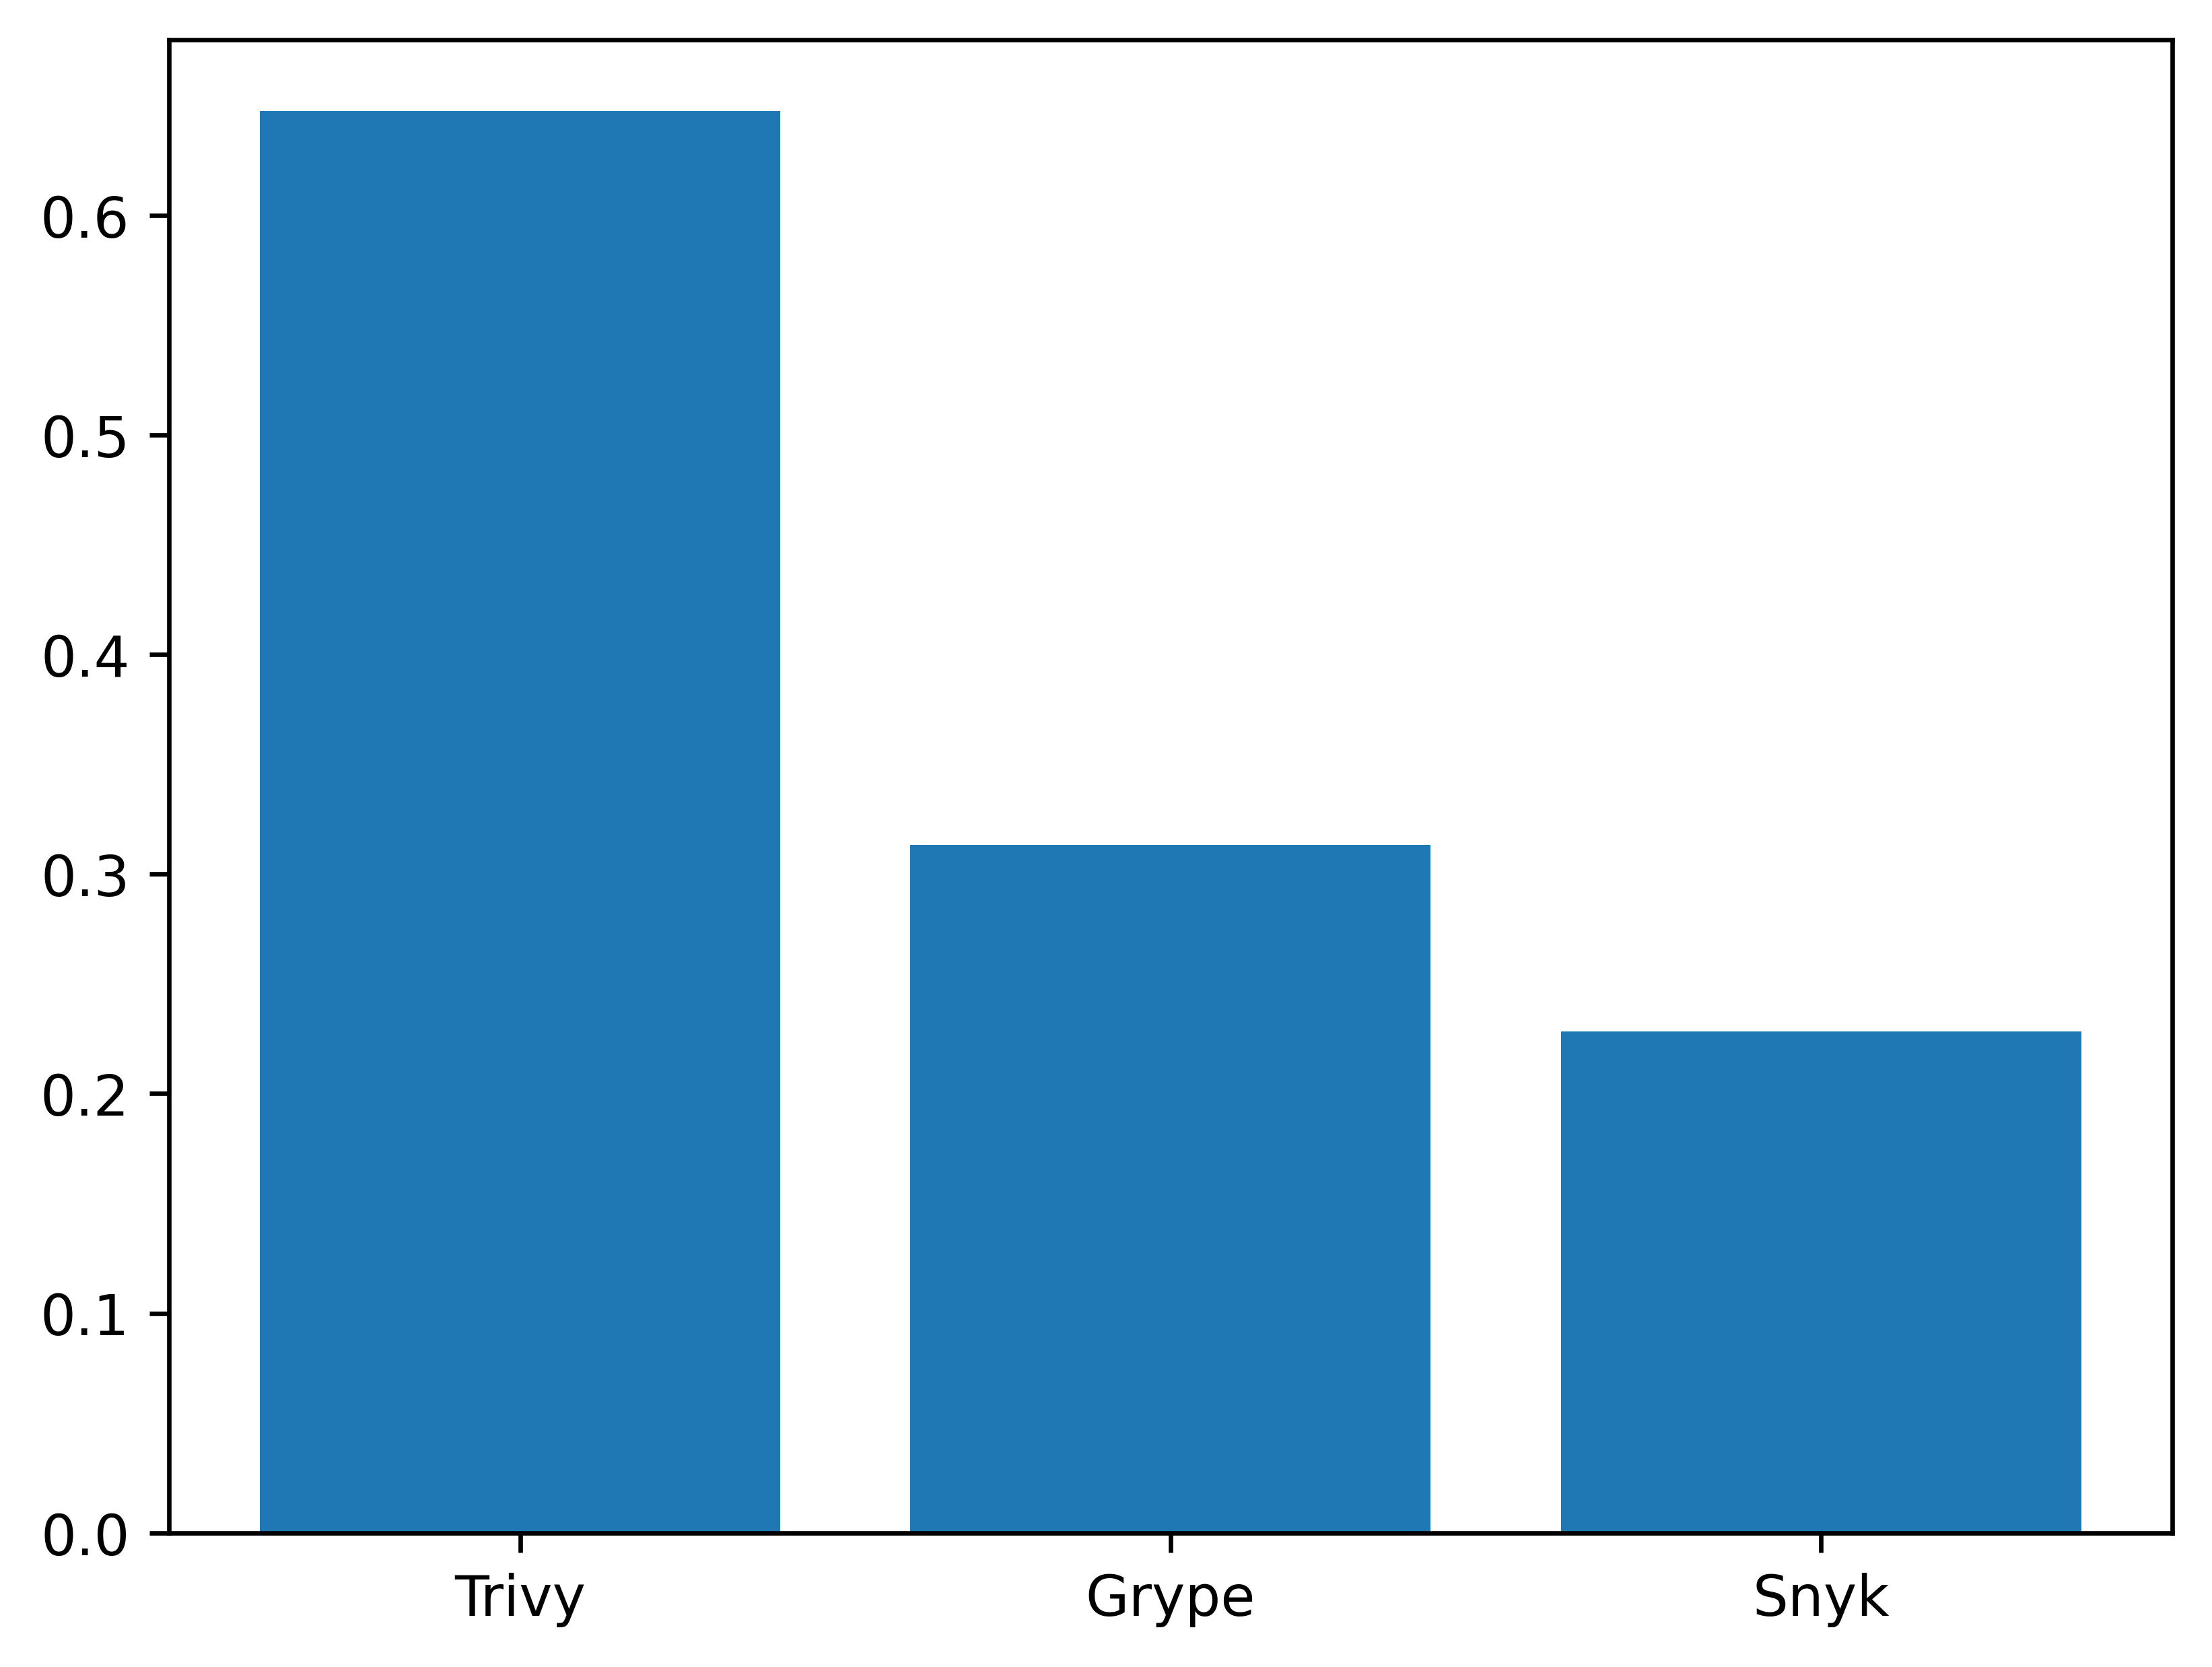

In [27]:
fig, ax = plt.subplots()
scanners = ['Trivy', 'Grype', 'Snyk']
counts = [trivy_uniq_vulns_javed, grype_uniq_vulns_javed, snyk_uniq_vulns_javed]
ax.bar(scanners, counts)
plt.show()

## Graphs

Text(0, 0.5, '')

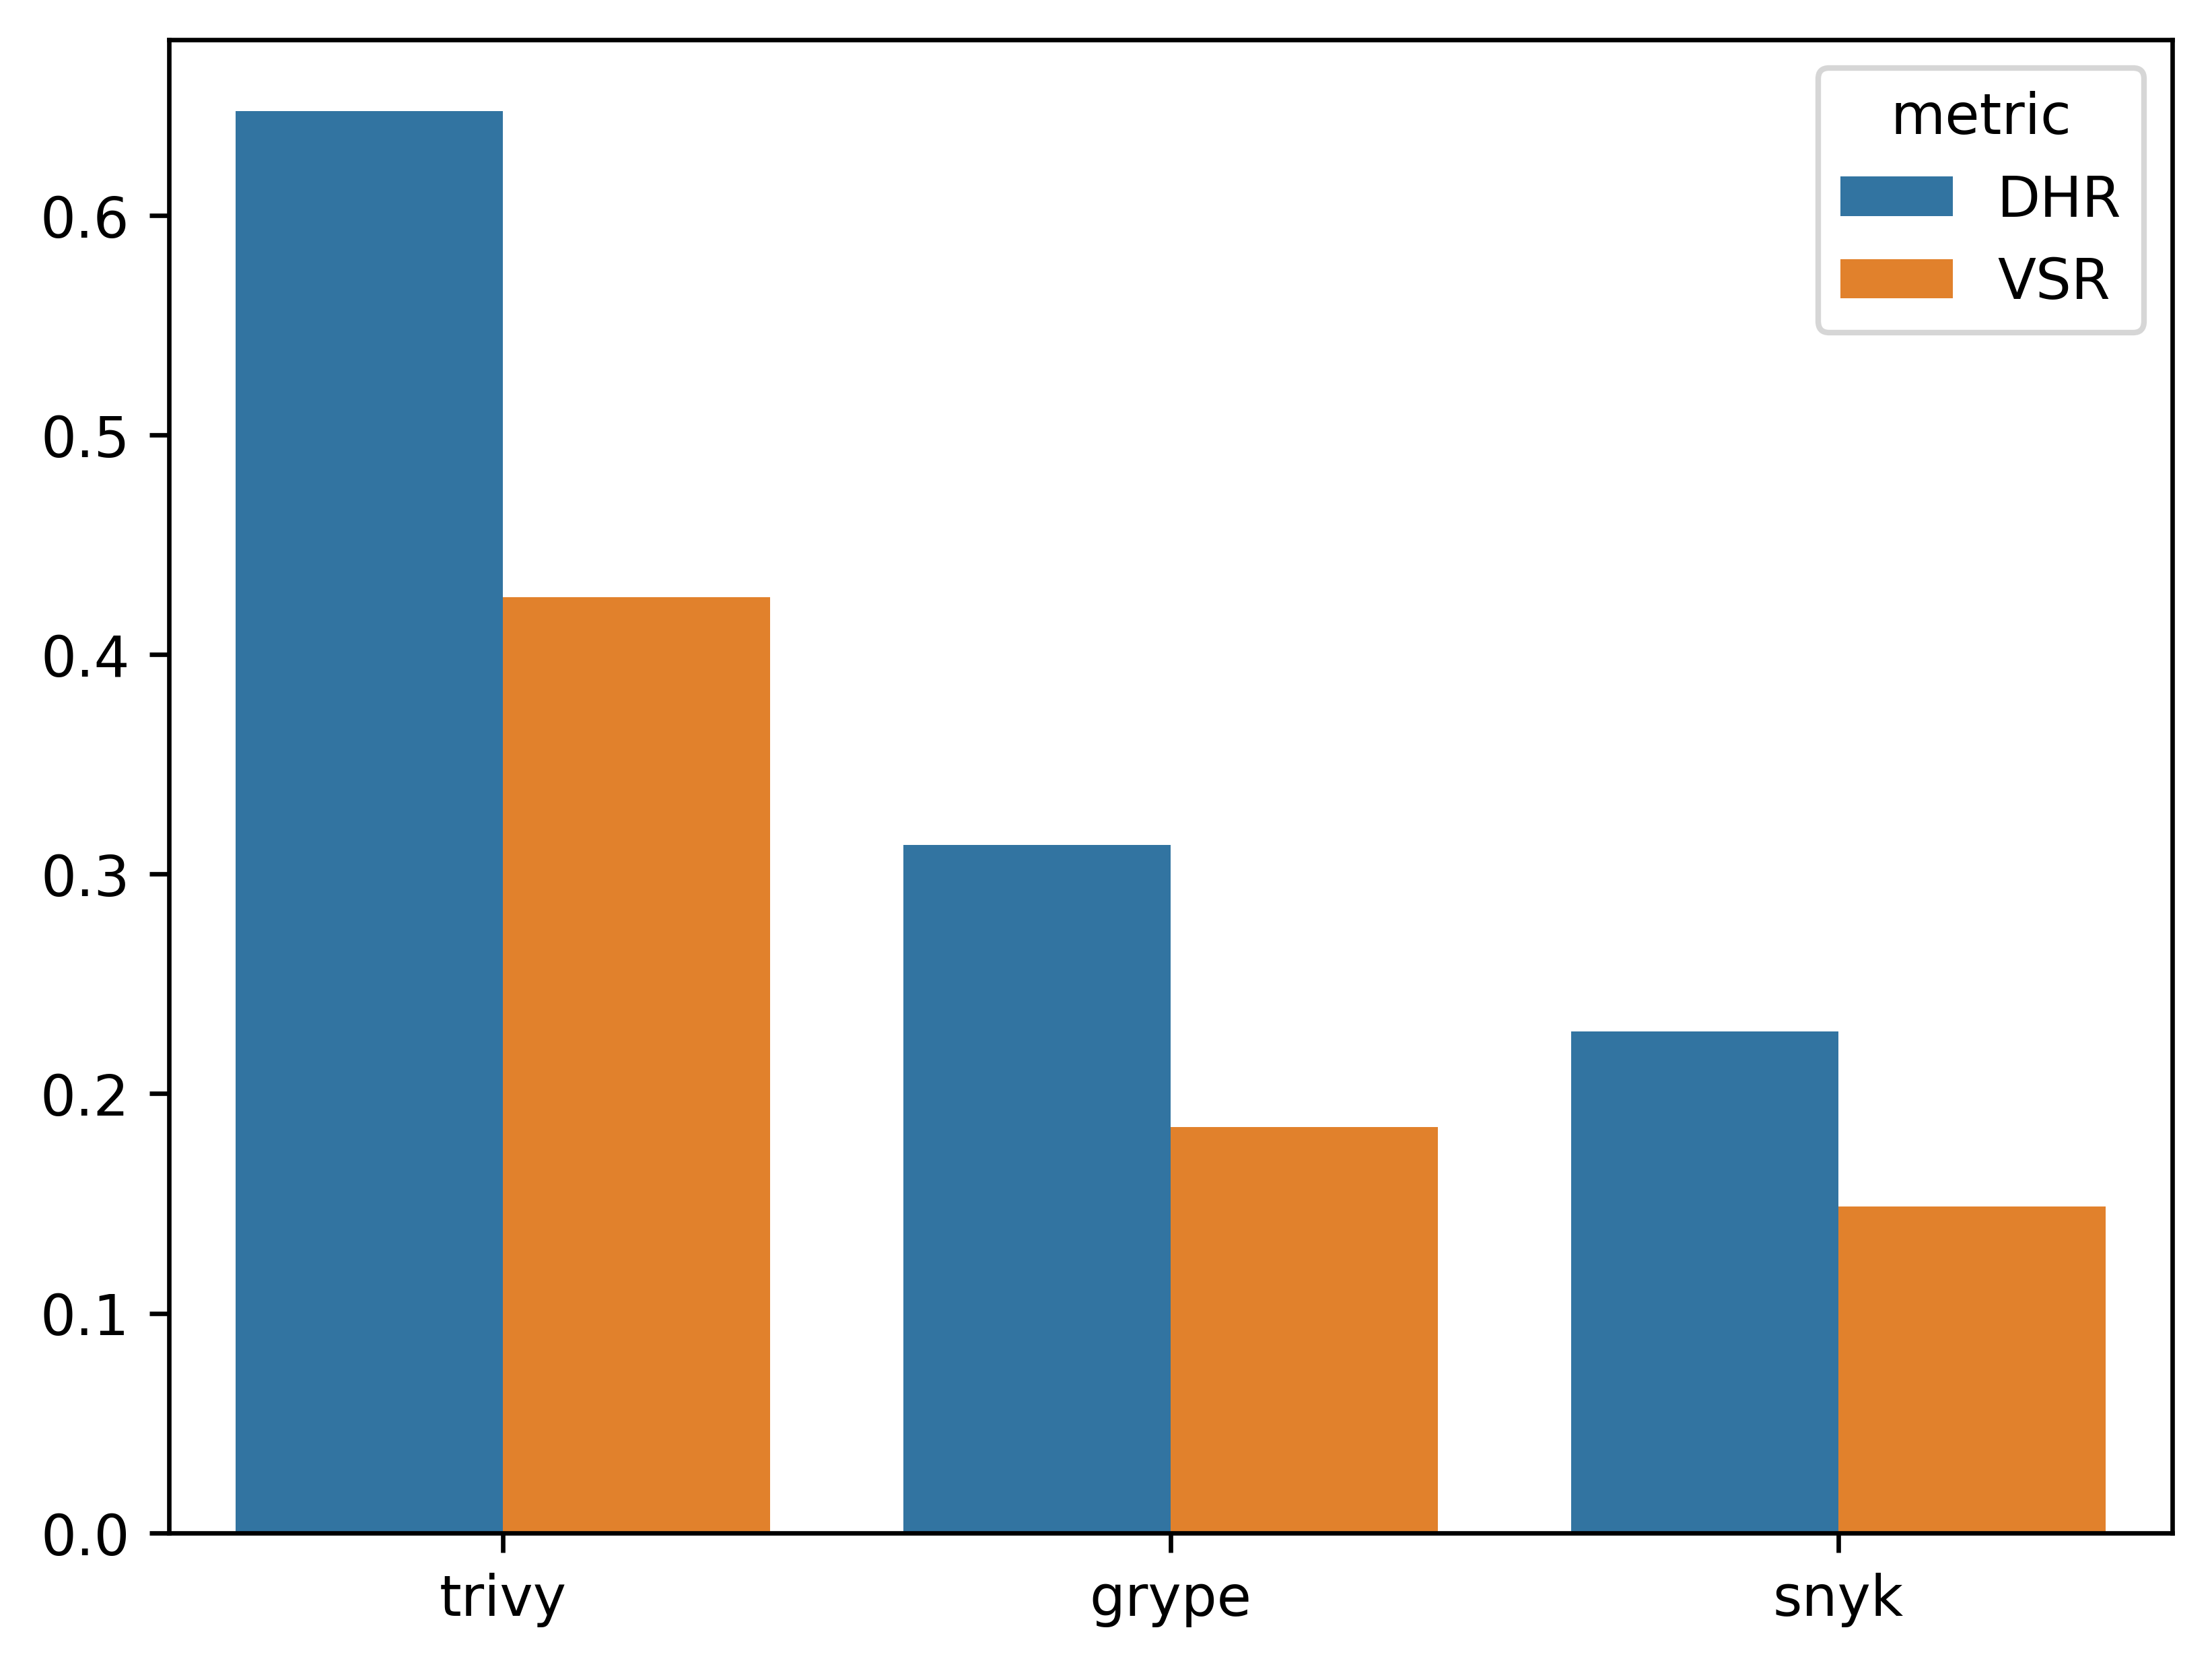

In [31]:
dfratio = pd.DataFrame(
    [
        ['DHR', 'trivy', trivy_uniq_vulns_javed], ['DHR', 'grype', grype_uniq_vulns_javed], ['DHR', 'snyk', snyk_uniq_vulns_javed],
        ['VSR', 'trivy', trivy_vuln_sum_new_metric], ['VSR', 'grype', grype_vuln_sum_new_metric], ['VSR', 'snyk', snyk_vuln_sum_new_metric]
    ],
    columns=['metric', 'tool', 'ratio']
)
ax = sns.barplot(data=dfratio, x='tool', y='ratio', hue='metric')
ax.set_xlabel("")
ax.set_ylabel("")

<Axes: xlabel='division', ylabel='ratio'>

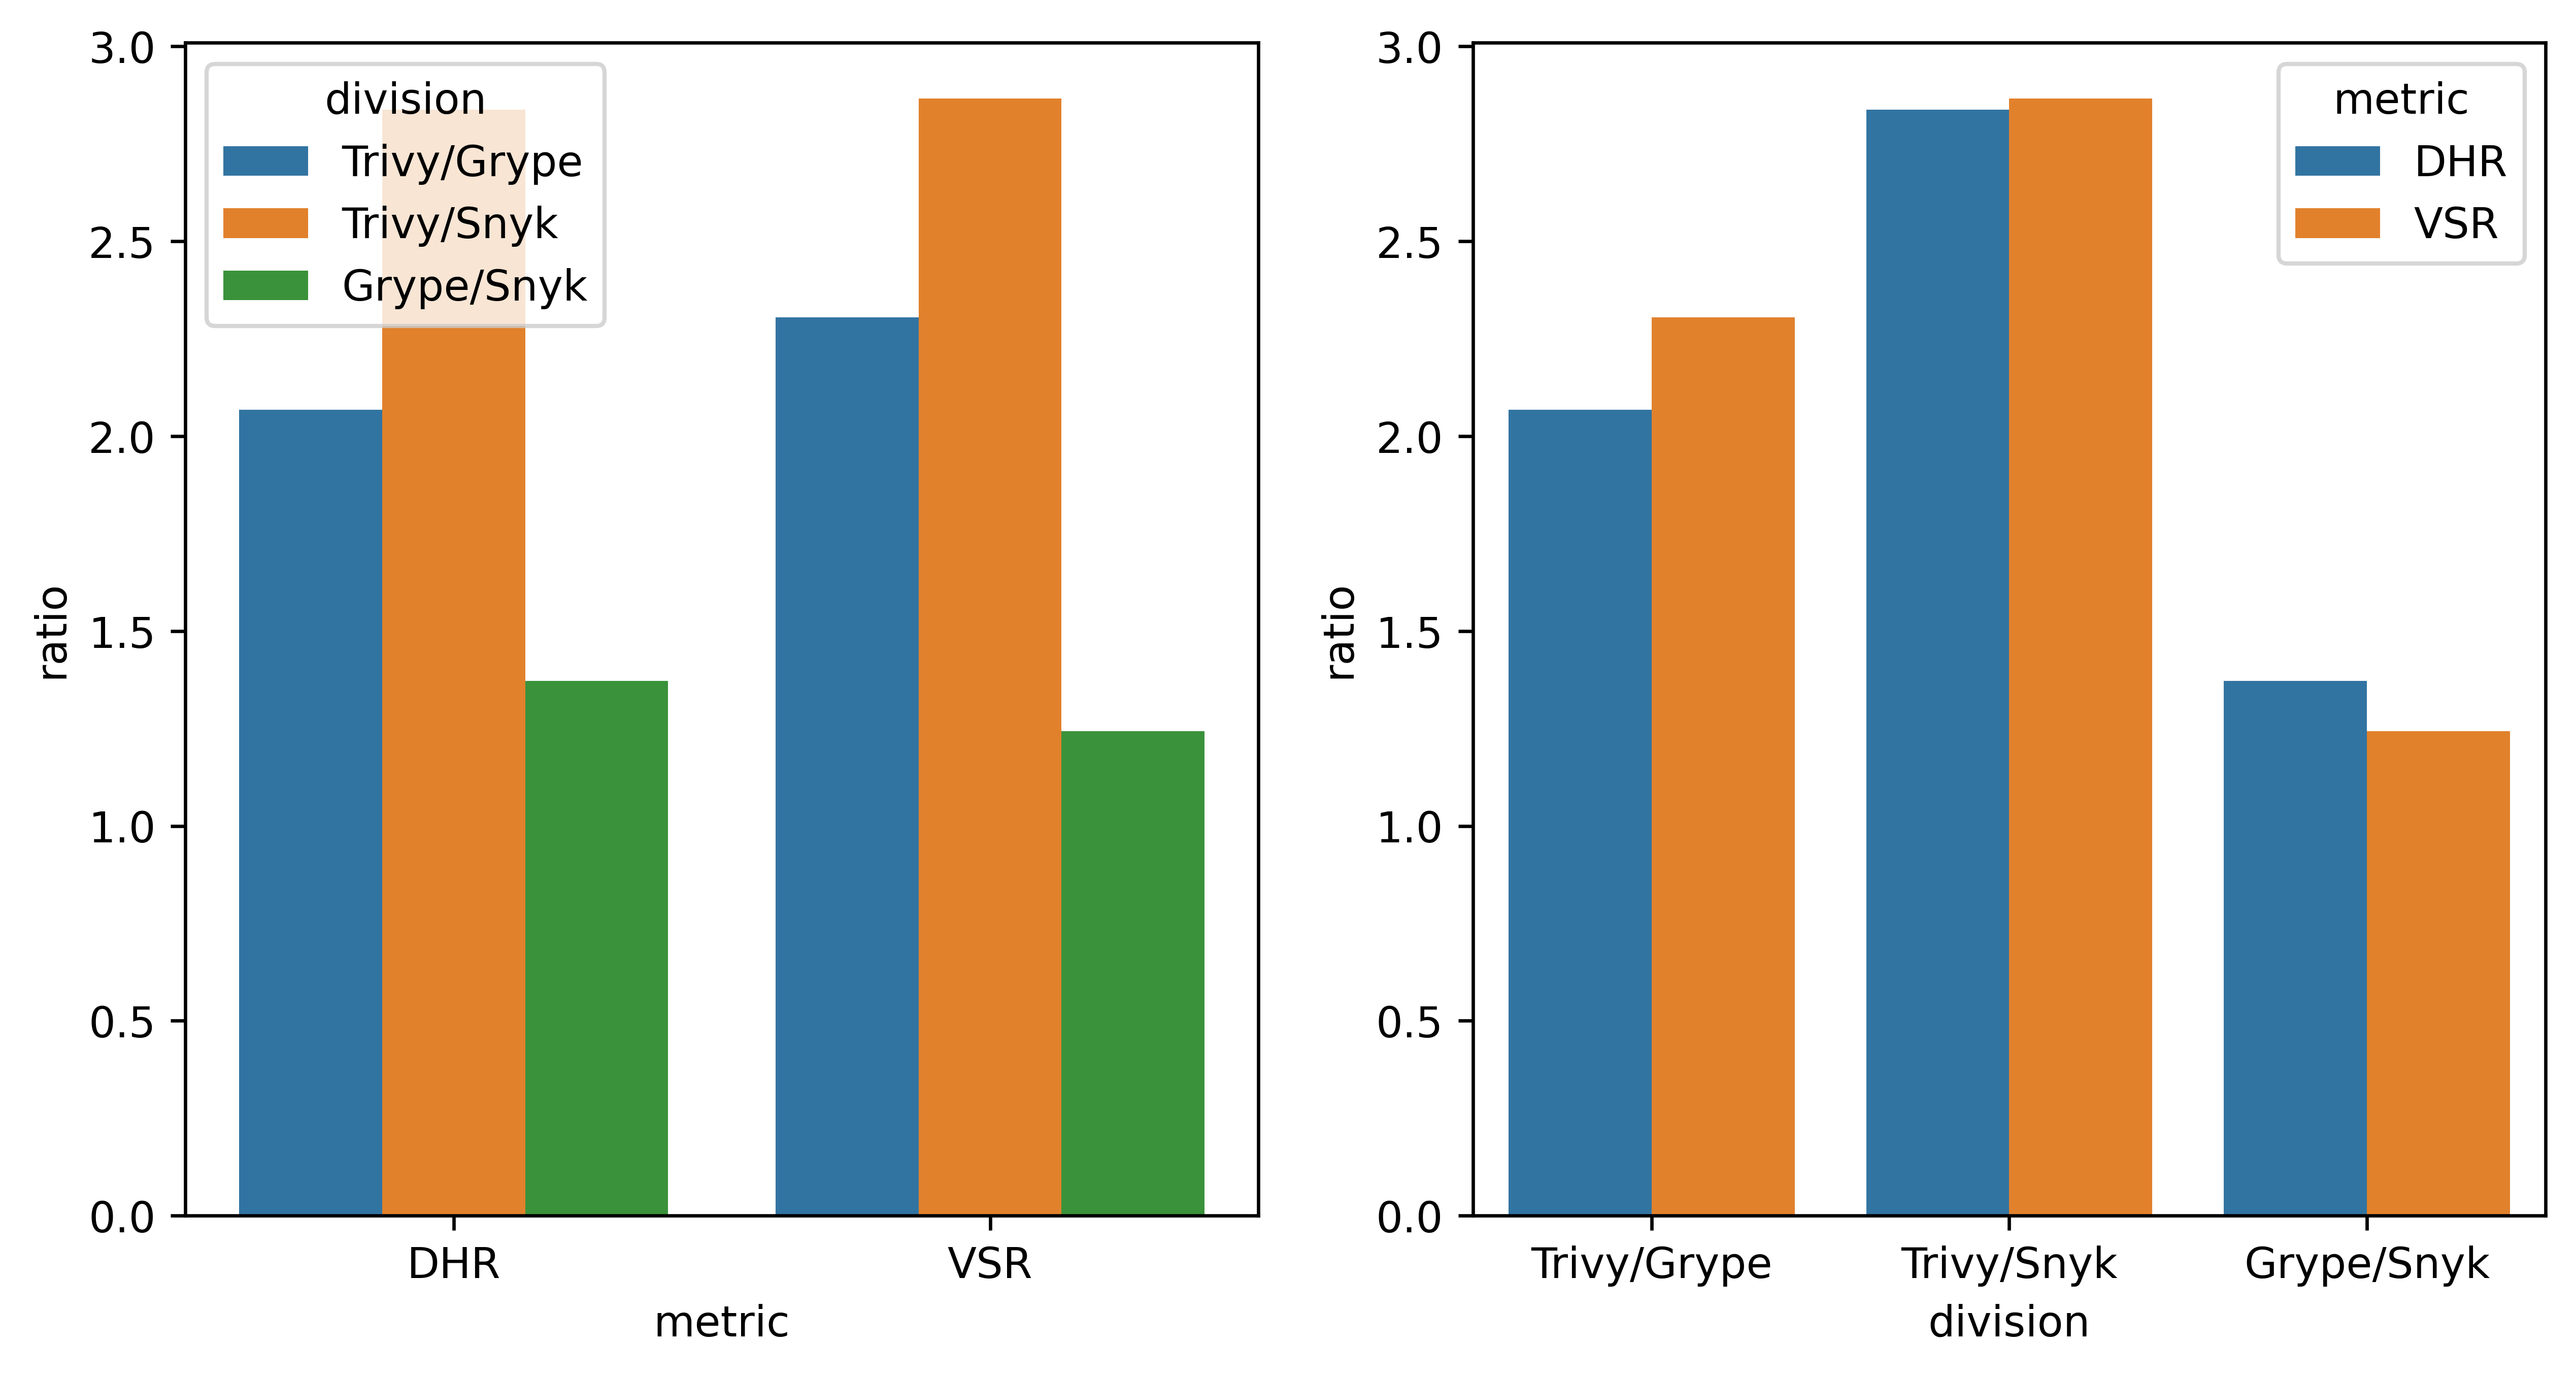

In [ ]:
dfratio = pd.DataFrame(
    [
        ['DHR', 'Trivy/Grype', trivy_uniq_vulns_javed / grype_uniq_vulns_javed],
        ['DHR', 'Trivy/Snyk', trivy_uniq_vulns_javed / snyk_uniq_vulns_javed],
        ['DHR', 'Grype/Snyk', grype_uniq_vulns_javed / snyk_uniq_vulns_javed],

        ['VSR', 'Trivy/Grype', trivy_vuln_sum_new_metric / grype_vuln_sum_new_metric],
        ['VSR', 'Trivy/Snyk', trivy_vuln_sum_new_metric / snyk_vuln_sum_new_metric],
        ['VSR', 'Grype/Snyk', grype_vuln_sum_new_metric / snyk_vuln_sum_new_metric],
    ],
    columns=['metric', 'division', 'ratio']
)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=dfratio, x='metric', y='ratio', hue='division', ax=axs[0])
sns.barplot(data=dfratio, x='division', y='ratio', hue='metric', ax=axs[1])

## VENN Diagrams

- https://practicaldatascience.co.uk/data-science/how-to-visualise-data-using-venn-diagrams-in-matplotlib
- https://towardsdatascience.com/plotting-venn-diagrams-in-python-6c55e0d78e57
- https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305
- https://jingwen-z.github.io/data-viz-with-matplotlib-series6-venn-diagram/

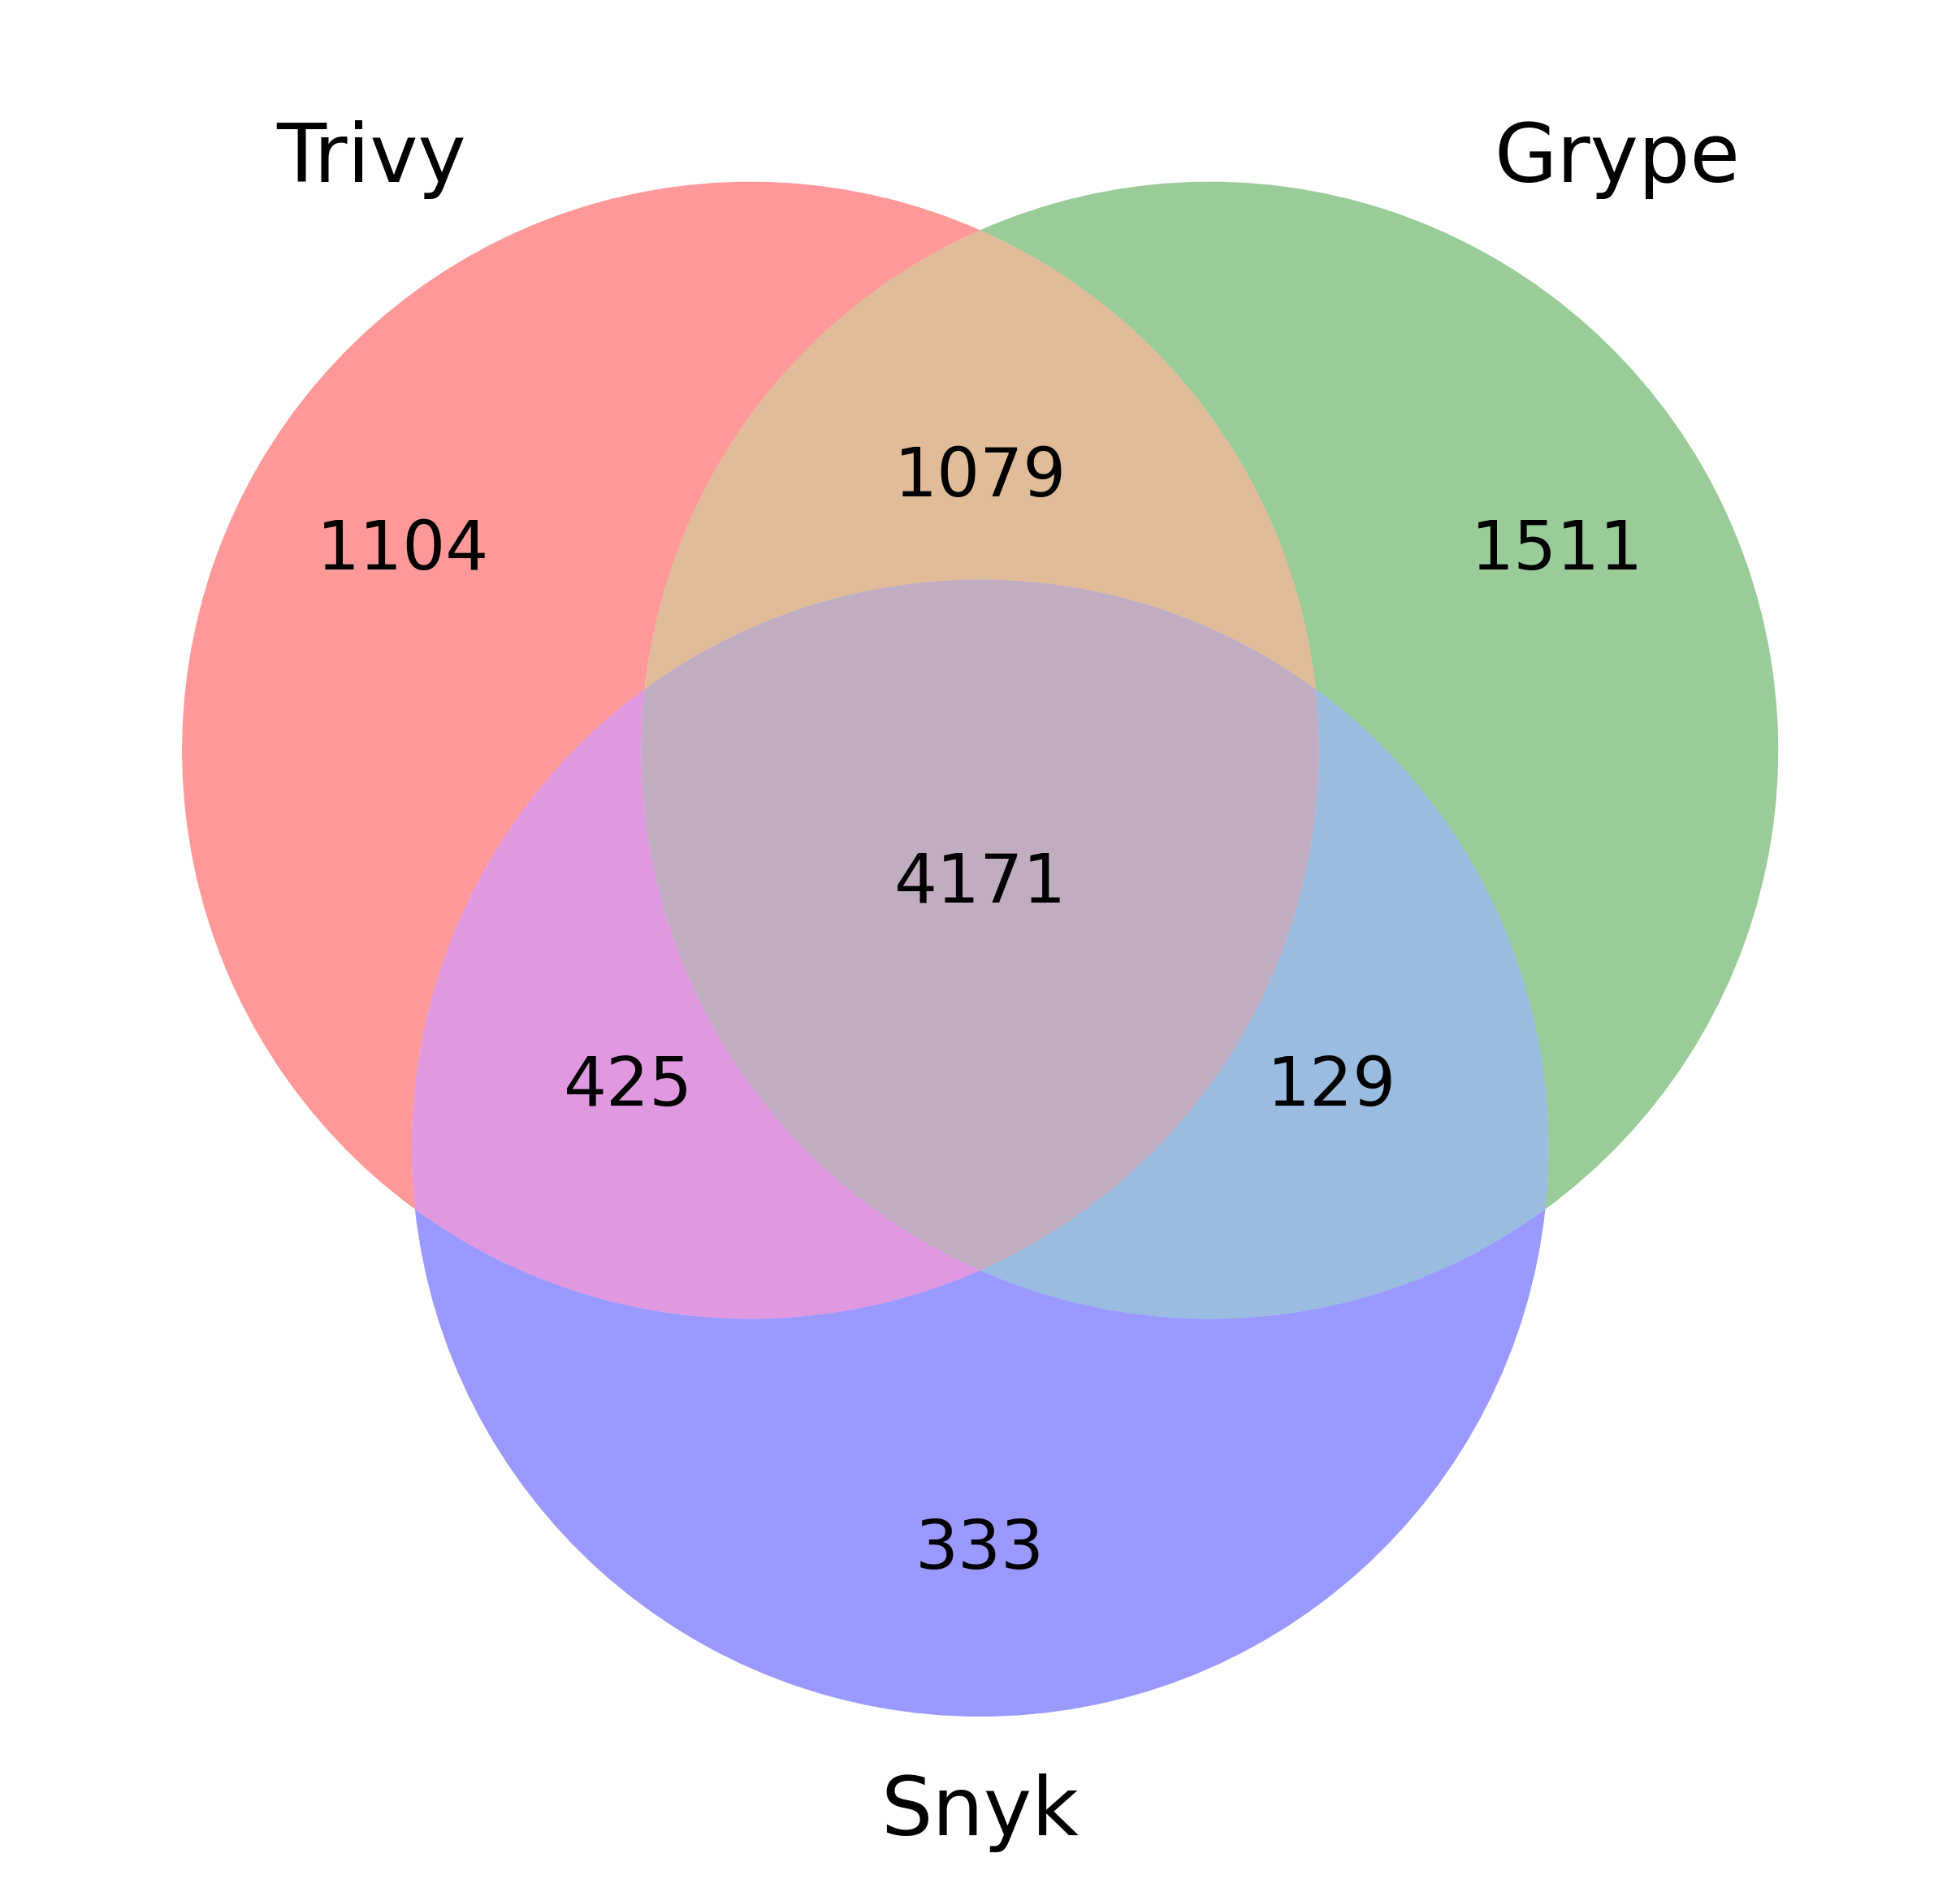

In [ ]:
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted

venn_vulns = [
    set(trivy_vulns["id"].to_list()),
    set(grype_vulns["id"].to_list()),
    set(snyk_vulns["id"].to_list()),
]

venn_vulns_pkg = [
    set(trivy_uniq_vulns["pkgname"].to_list()),
    set(grype_uniq_vulns["pkgname"].to_list()),
    set(snyk_uniq_vulns["pkgname"].to_list()),
]

# venn3(venn_vulns, ("Trivy", "Grype", "Snyk"))
venn3_unweighted(venn_vulns, ("Trivy", "Grype", "Snyk"))
# plt.show()